In [14]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from astroquery.skyview import SkyView
import astropy.units as u
from astropy.io import fits
from astropy.visualization import ZScaleInterval
from sklearn.cluster import DBSCAN
from tqdm import tqdm

ModuleNotFoundError: No module named 'tqdm'

In [ ]:
file_address = 'E:\\DESKTOP_2\\Astronomical_Data\\Gaia Mission\\LensObservation_000000-003111.csv'
df_grav = pd.read_csv(file_address, skiprows=84)
display(df_grav)


solution_id          source_id  component_id  observation_id  \
0       4311356335145164801  26361066154352384             1               1   
1       4311356335145164801  26361066154352384             1               2   
2       4311356335145164801  26361066154352384             1               3   
3       4311356335145164801  26361066154352384             1               4   
4       4311356335145164801  26361066154352384             1               5   
...                     ...                ...           ...             ...   
162084  4311356335145164801  12060650421286144             1              43   
162085  4311356335145164801  12060650421286144             1              44   
162086  4311356335145164801  12060650421286144             1              45   
162087  4311356335145164801  12060650421286144             1              46   
162088  4311356335145164801  12060650421286144             1              47   

           ra_obs    dec_obs  g_flux_obs  g_flux_obs_error  g_mag_obs  \
0       38.254883  12.545217  215.871130          3.999995  19.921875   
1       38.254867  12.545211  157.218610          5.239427  20.187500   
2       38.254866  12.545218  156.144562          6.123502  20.062500   
3       38.254861  12.545204  188.070167          5.307541  20.031250   
4       38.254897  12.545208  176.477874          3.366170  20.031250   
...           ...        ...         ...               ...        ...   
162084  55.141632   9.660781  168.920215          5.029663  19.875000   
162085  55.141645   9.660791  167.809581          4.474064  19.984375   
162086  55.141637   9.660764  172.325479          5.896179  20.062500   
162087  55.141657   9.660785  182.433723          3.954744  20.031250   
162088  55.141653   9.660787  181.490335          8.264885  19.953125   

          epoch_obs  
0       2197.664324  
1       1872.599106  
2       2386.613608  
3       2247.645756  
4       2063.881978  
...             ...  
162084  1734.487705  
162085  1874.090568  
162086  1874.016569  
162087  1736.238982  
162088  2068.306232  

[162089 rows x 10 columns]

- `solution_id`: Um identificador para a solução de dados ou catálogo específico onde estas observações são registradas.
- `source_id`: O identificador da fonte astronômica observada (como uma estrela ou galáxia).
- `component_id`: Pode ser uma identificação para diferentes componentes ou objetos em uma única observação.
- `observation_id`: Um número sequencial que identifica a observação dentro do conjunto de dados.
- `ra_obs`: Abreviação de Right Ascension (Ascensão Reta), que é uma das coordenadas usadas para localizar estrelas no céu, similar à longitude na Terra.
- `dec_obs`: Abreviação de Declination (Declinação), que é a outra coordenada usada no sistema equatorial celeste, similar à latitude na Terra.
- `g_flux_obs`: A medida do fluxo observado na banda g (uma faixa do espectro eletromagnético) que pode estar relacionada à luminosidade do objeto.
- `g_flux_obs_error`: O erro associado à medição do fluxo observado.
- `g_mag_obs`: A magnitude aparente do objeto na banda g, que é uma medida do brilho conforme observado da Terra.
- `epoch_obs`: A época da observação, que geralmente é dada em anos Julianos ou alguma outra medida de tempo astronômico.


![Representação de Lentes Gravitacionais](representação-lentes-gravitacionais--300x185.png)
![Representação de Lentes Gravitacionais2](Lm3K7SBFFkJHVauYDkXUvS.png)


In [ ]:
df_grav['ra_rad'] = np.radians(df_grav['ra_obs'])
df_grav['dec_rad'] = np.radians(df_grav['dec_obs'])

coords = df_grav[['ra_rad', 'dec_rad']].to_numpy()
eps_rad = 1/206265 
min_samples = 5  

db = DBSCAN(eps=eps_rad, min_samples=min_samples, metric='haversine')
db.fit(coords)

df_grav['cluster_label'] = db.labels_

clustered_data = df_grav[df_grav['cluster_label'] != -1]

clustered_data.head()


solution_id          source_id  component_id  observation_id  \
0  4311356335145164801  26361066154352384             1               1   
1  4311356335145164801  26361066154352384             1               2   
2  4311356335145164801  26361066154352384             1               3   
3  4311356335145164801  26361066154352384             1               4   
4  4311356335145164801  26361066154352384             1               5   

      ra_obs    dec_obs  g_flux_obs  g_flux_obs_error  g_mag_obs    epoch_obs  \
0  38.254883  12.545217  215.871130          3.999995  19.921875  2197.664324   
1  38.254867  12.545211  157.218610          5.239427  20.187500  1872.599106   
2  38.254866  12.545218  156.144562          6.123502  20.062500  2386.613608   
3  38.254861  12.545204  188.070167          5.307541  20.031250  2247.645756   
4  38.254897  12.545208  176.477874          3.366170  20.031250  2063.881978   

     ra_rad   dec_rad  cluster_label  
0  0.667674  0.218955              0  
1  0.667673  0.218955              0  
2  0.667673  0.218955              0  
3  0.667673  0.218955              0  
4  0.667674  0.218955              0

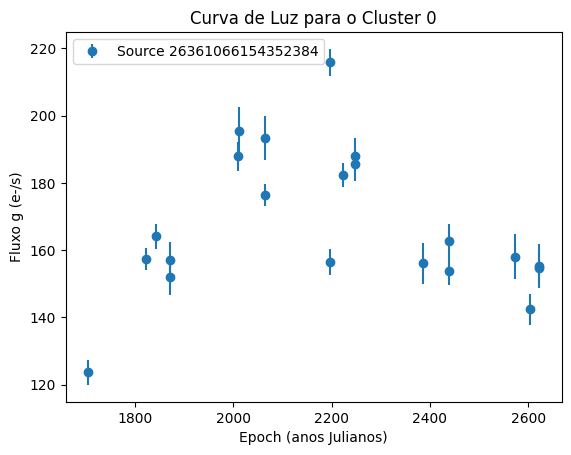

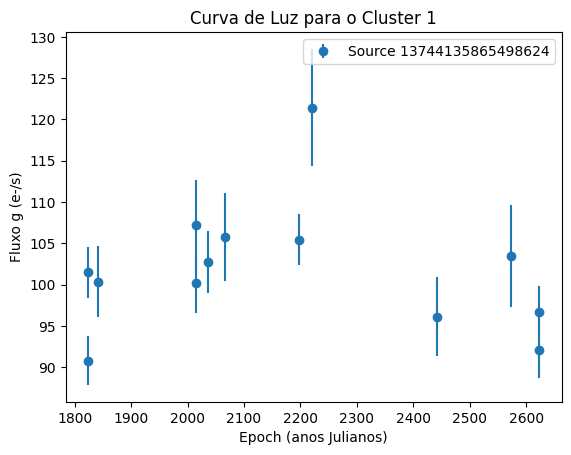

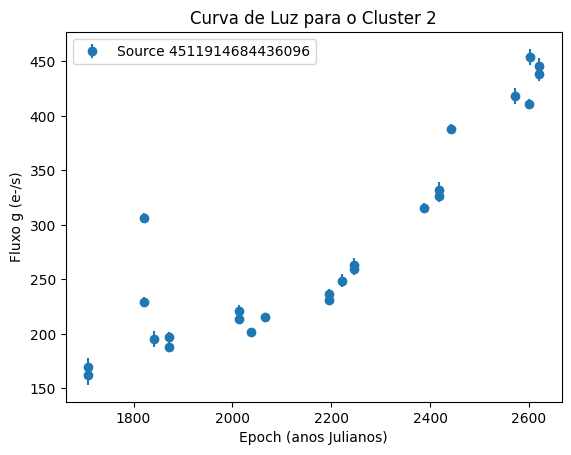

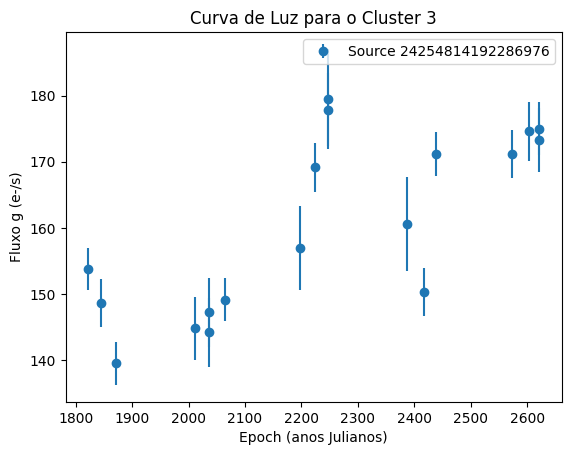

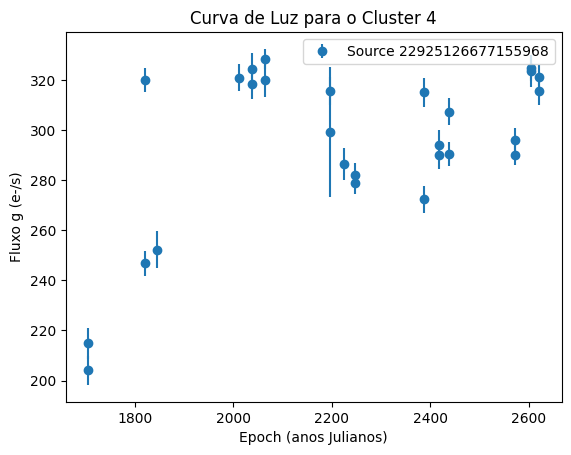

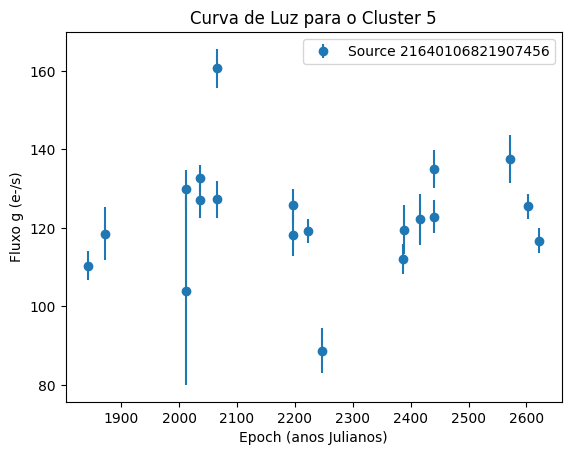

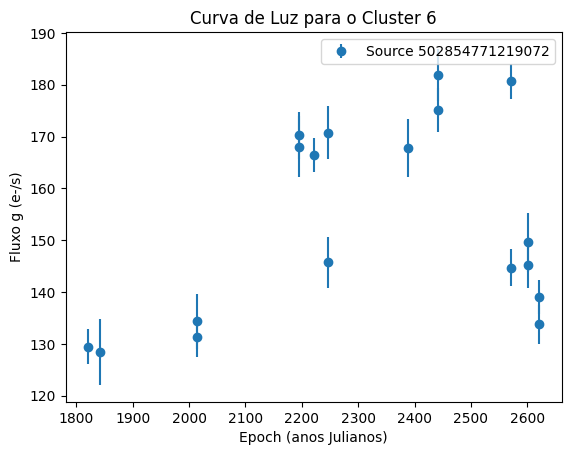

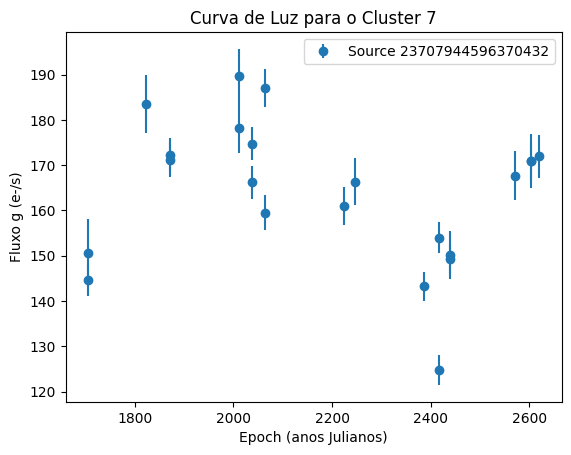

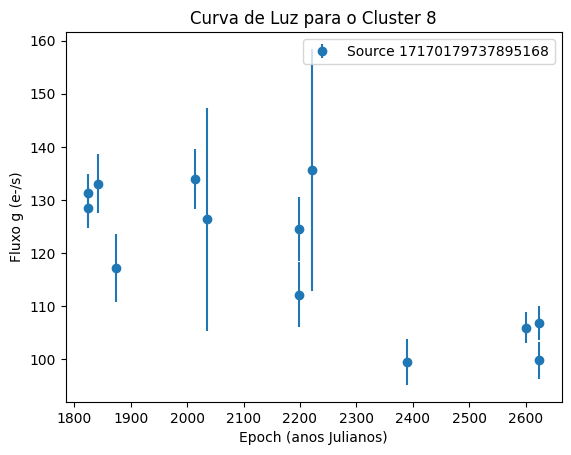

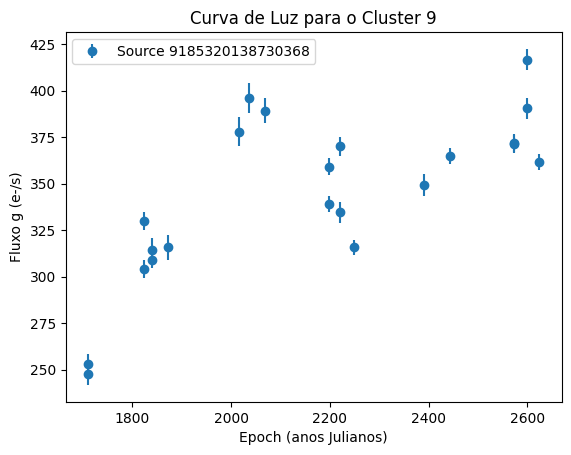

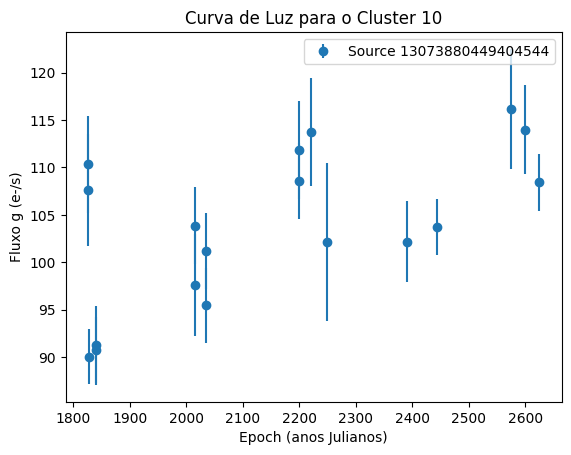

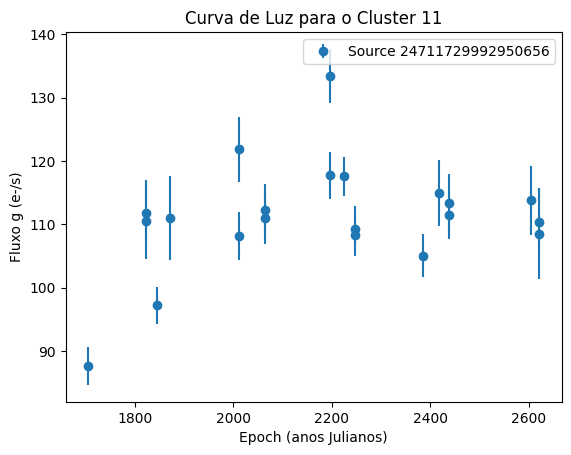

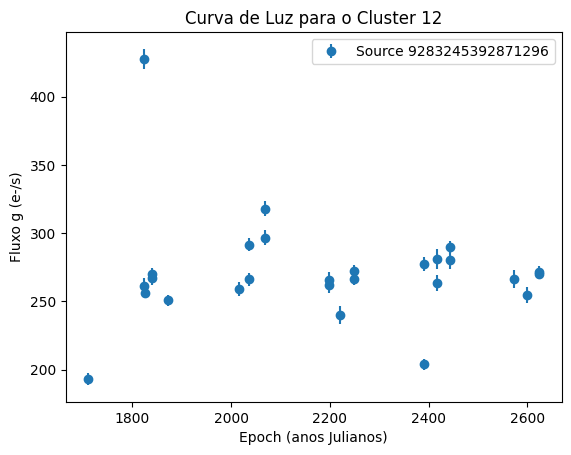

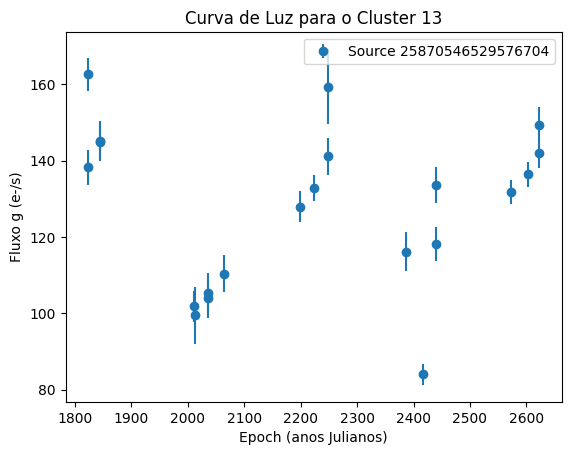

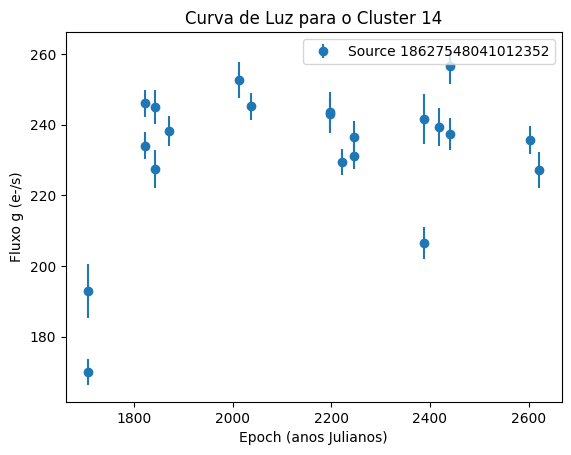

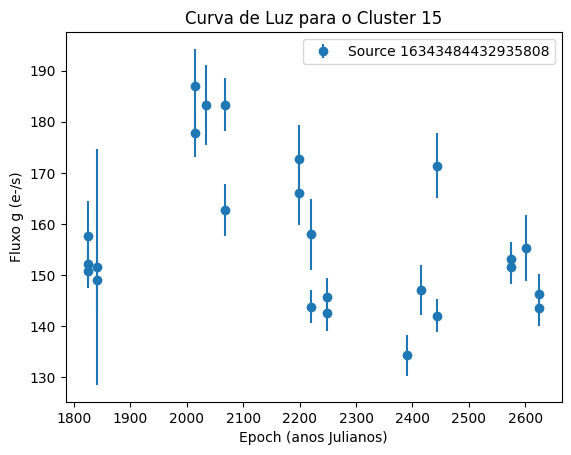

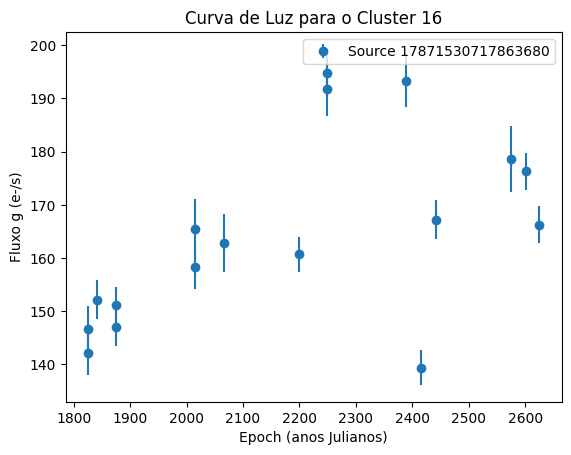

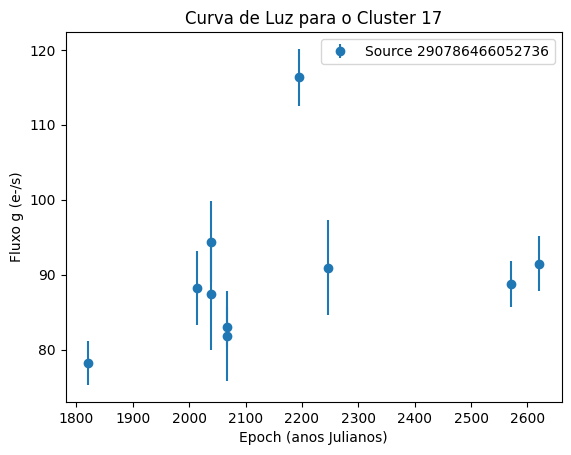

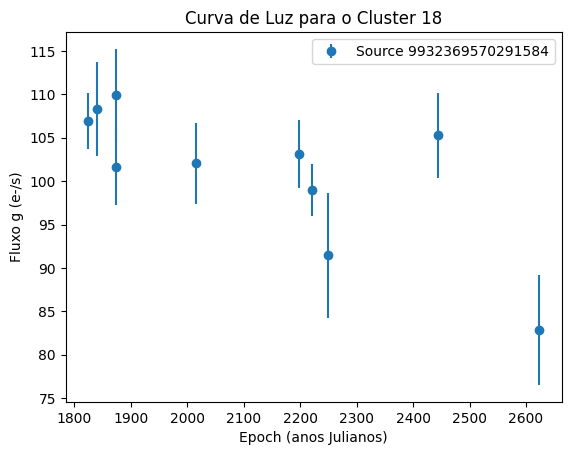

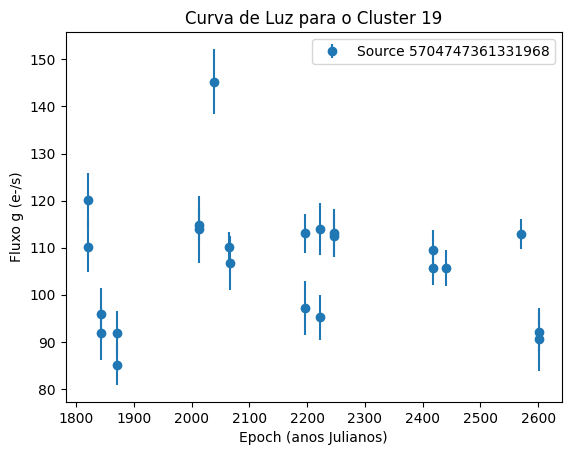

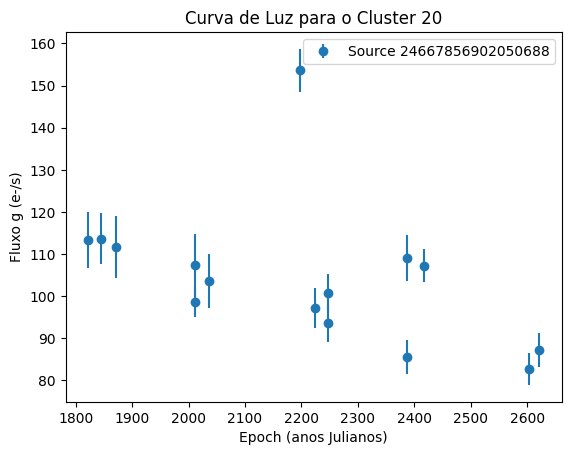

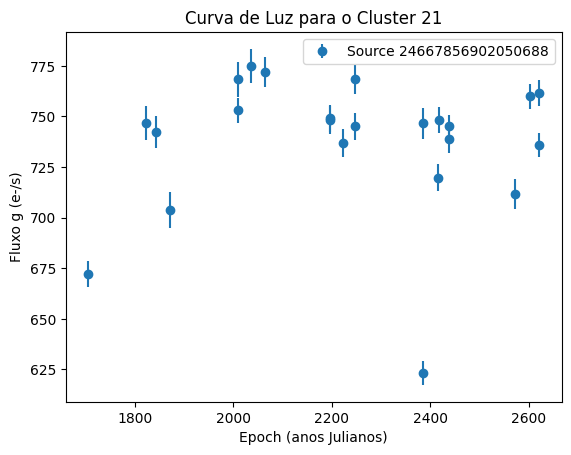

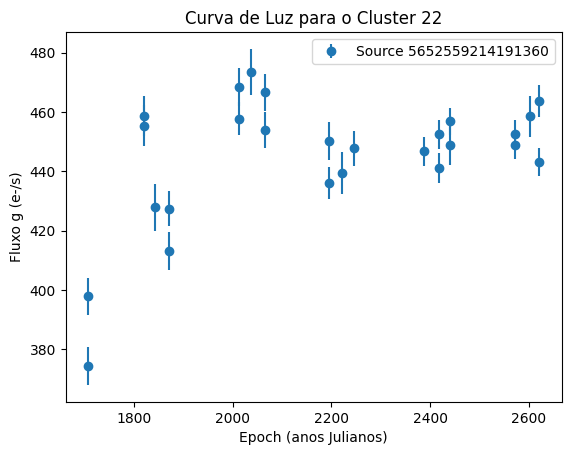

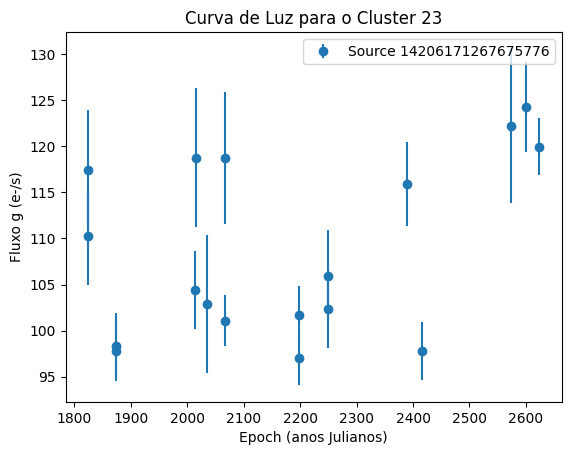

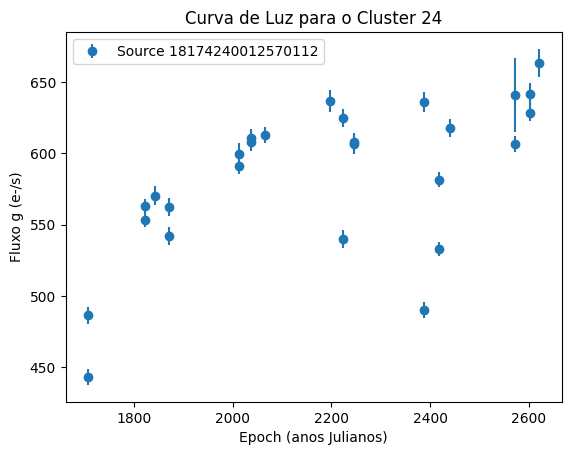

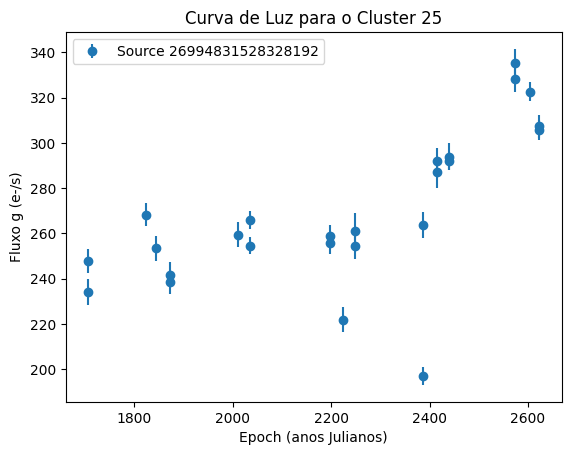

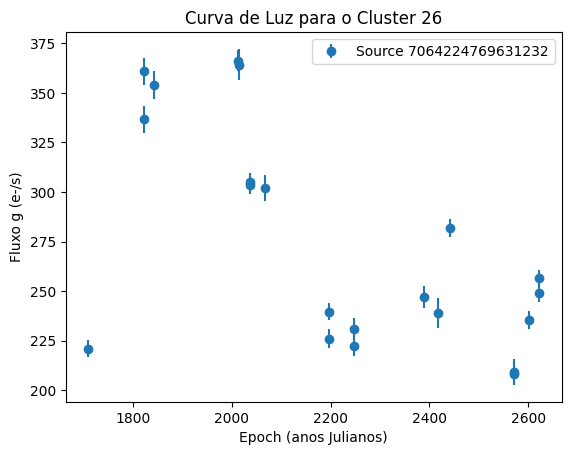

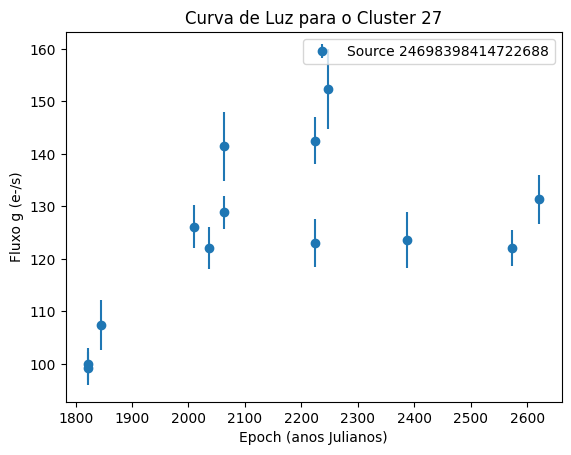

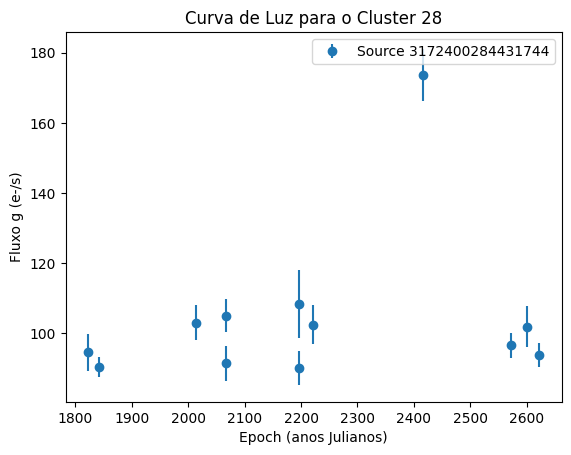

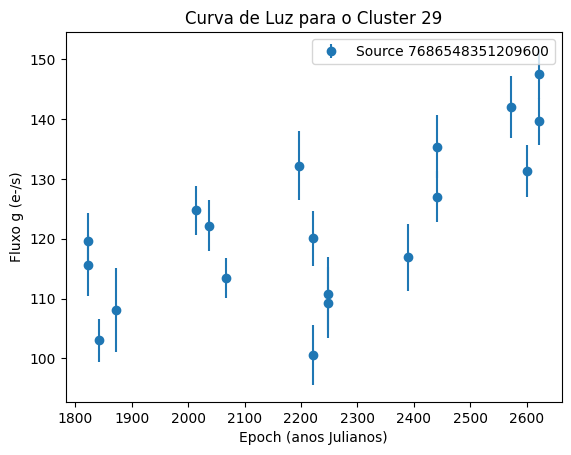

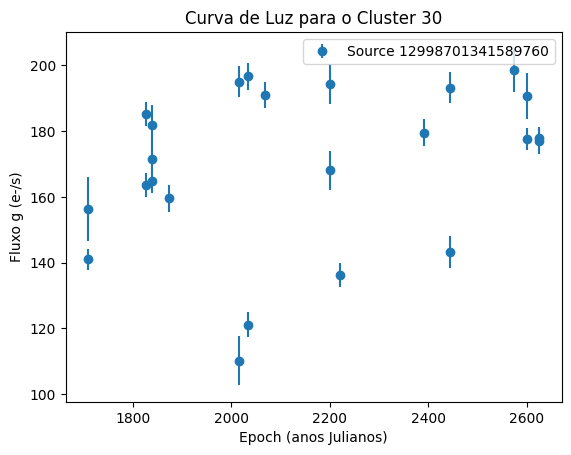

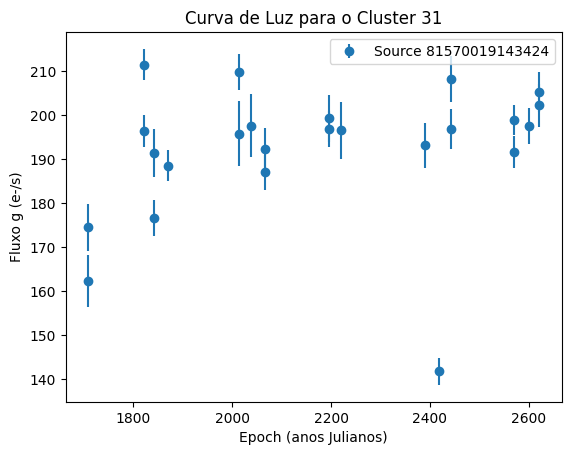

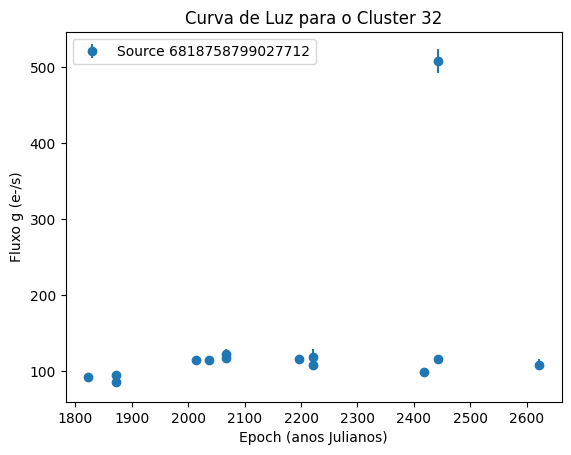

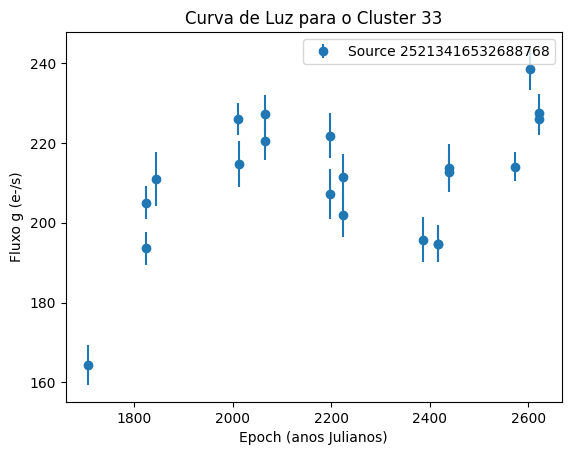

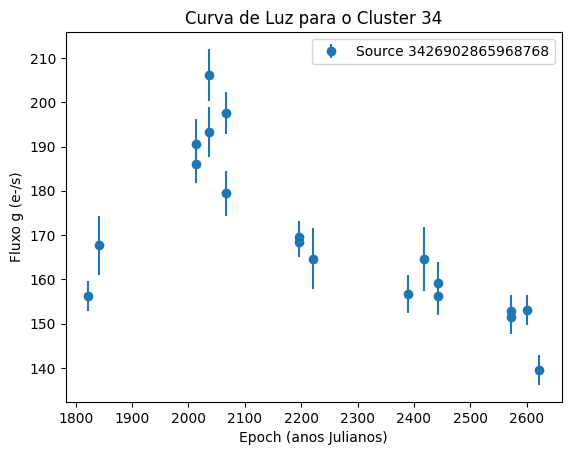

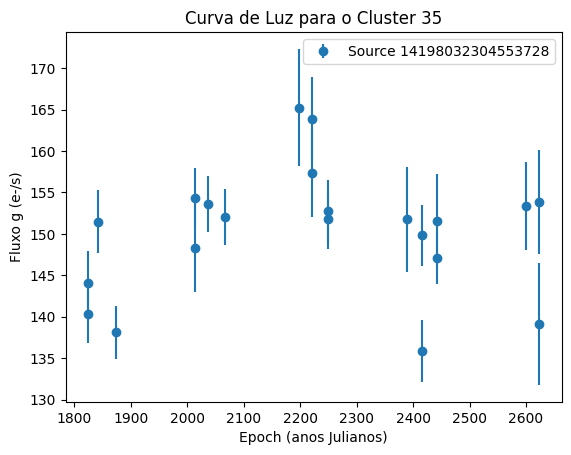

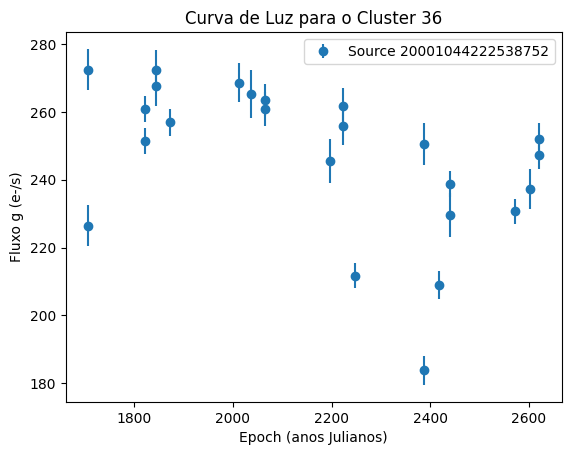

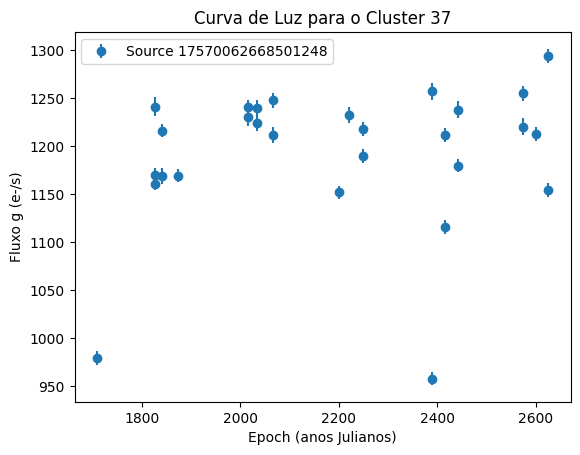

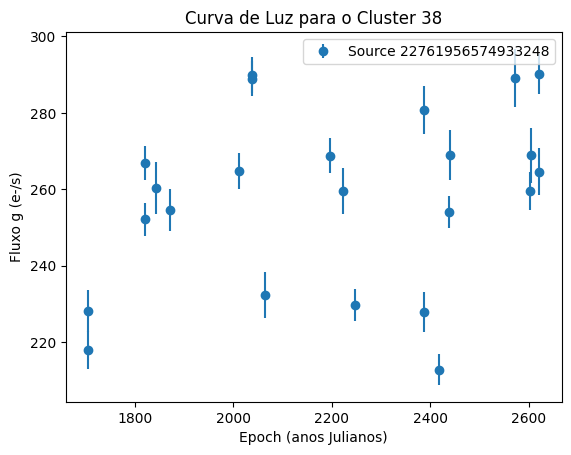

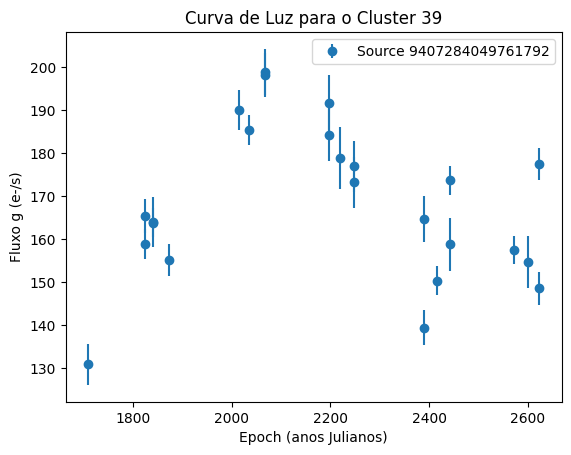

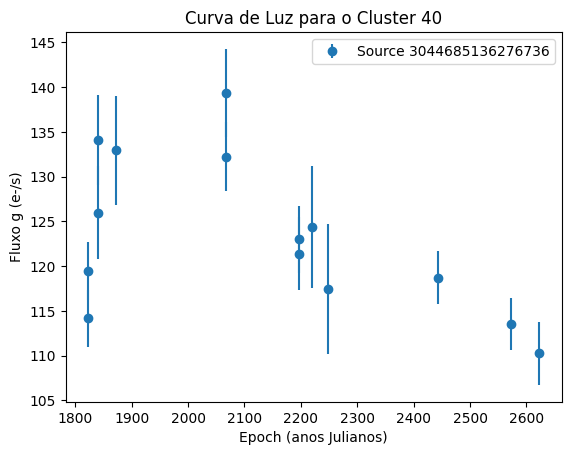

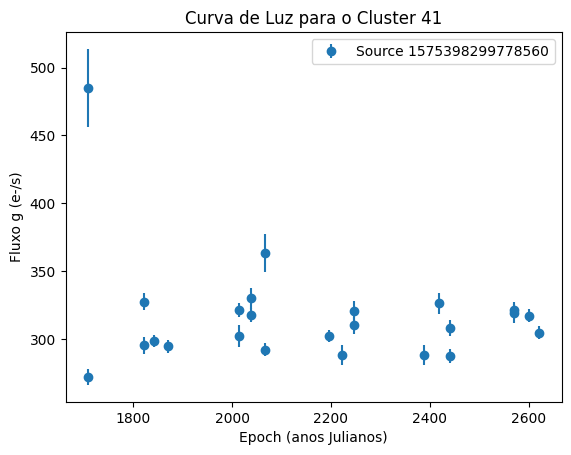

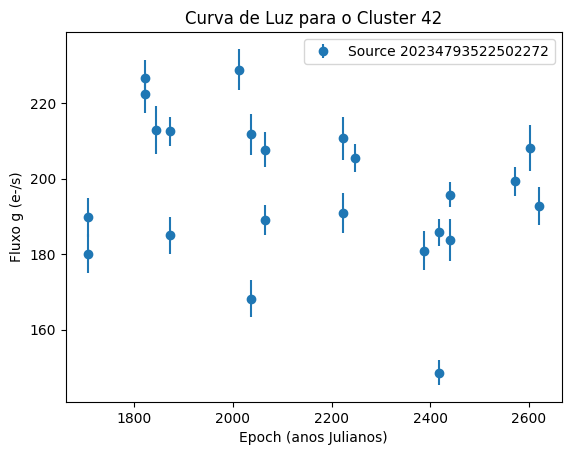

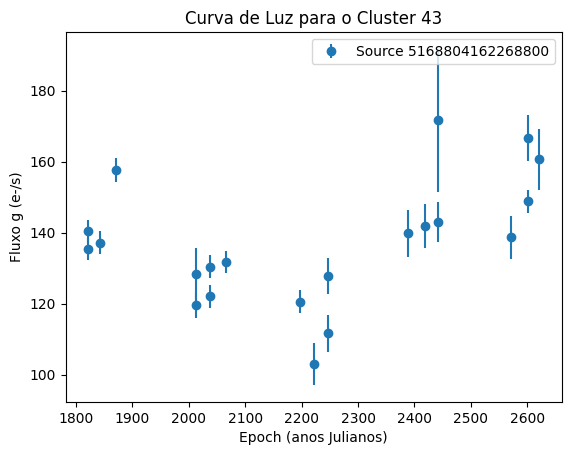

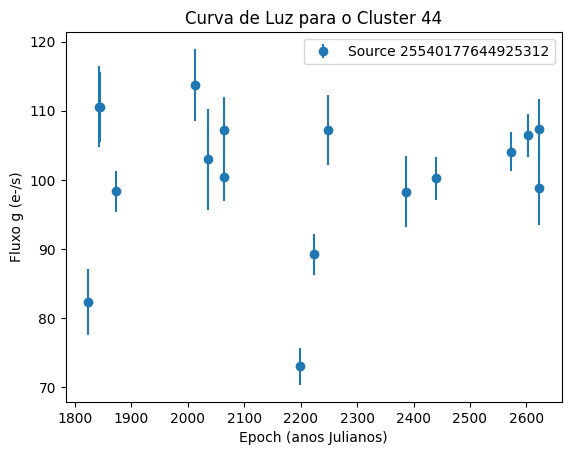

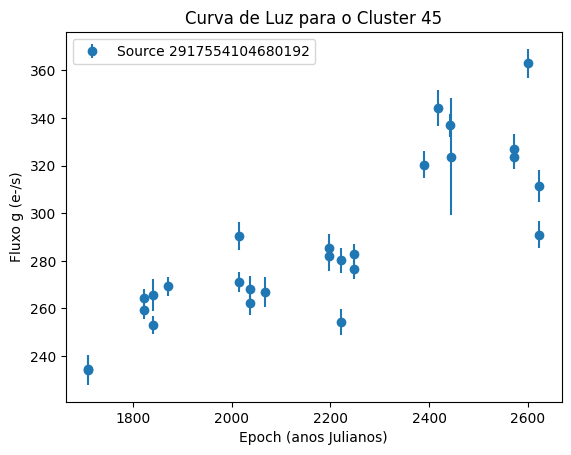

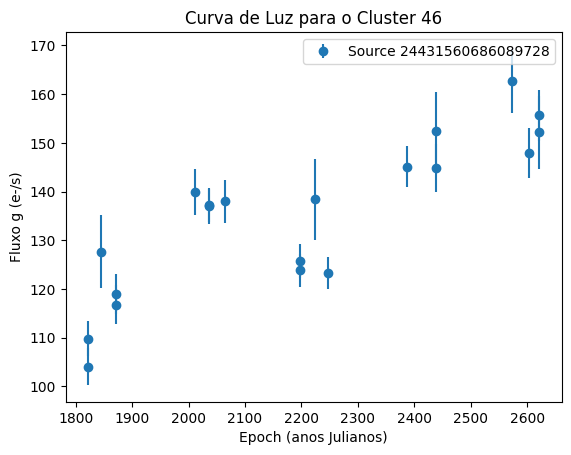

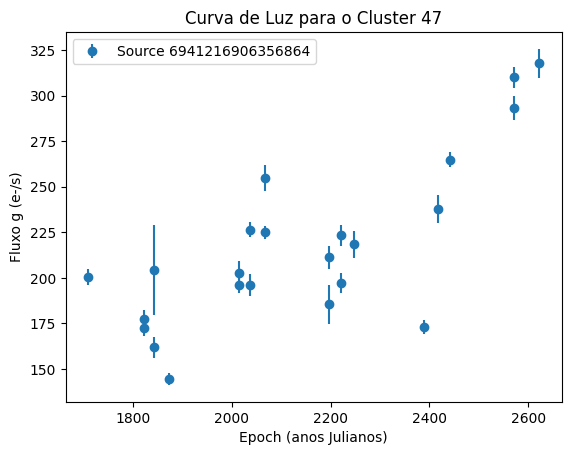

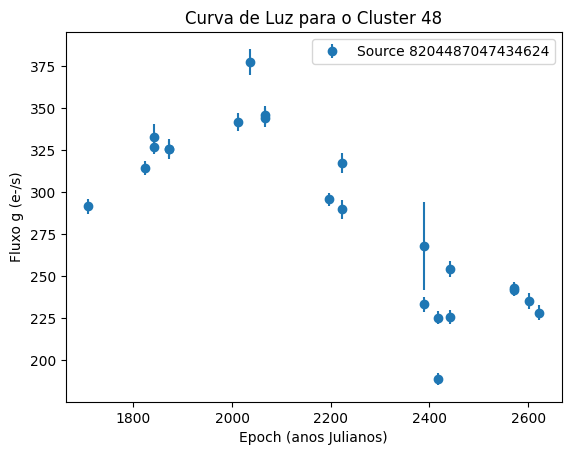

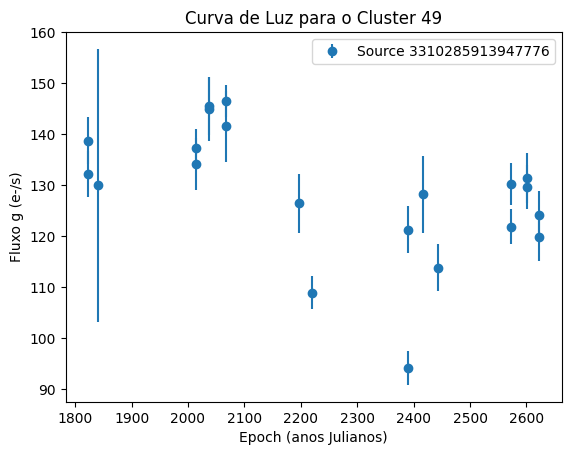

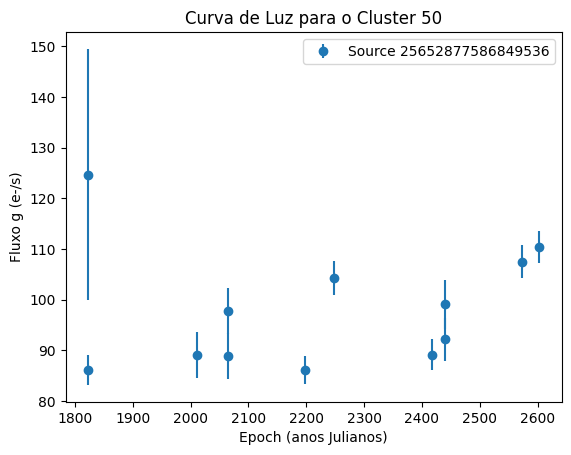

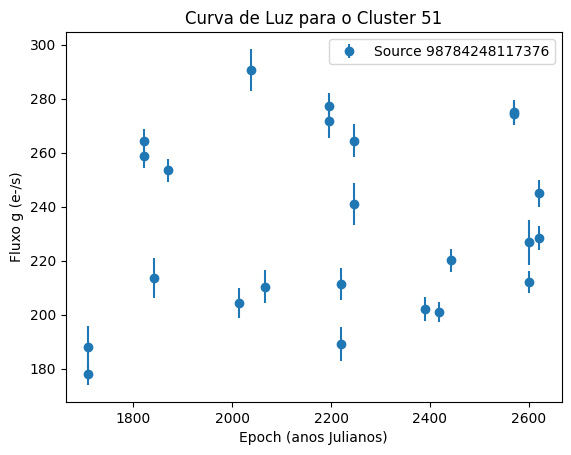

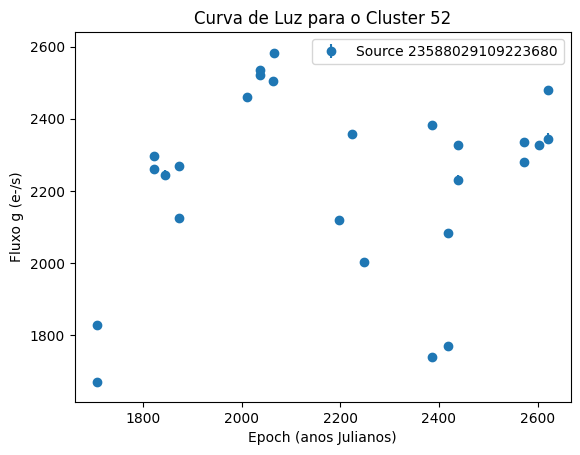

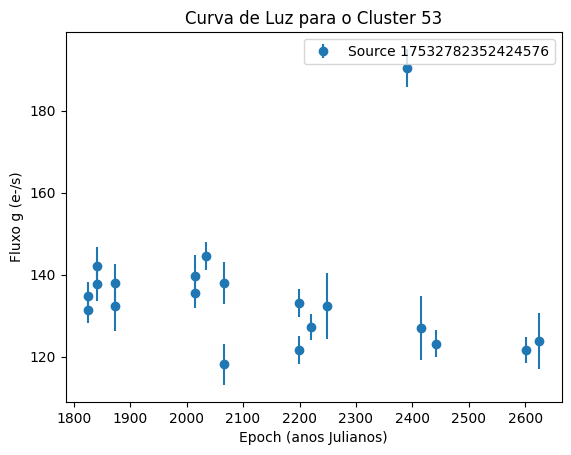

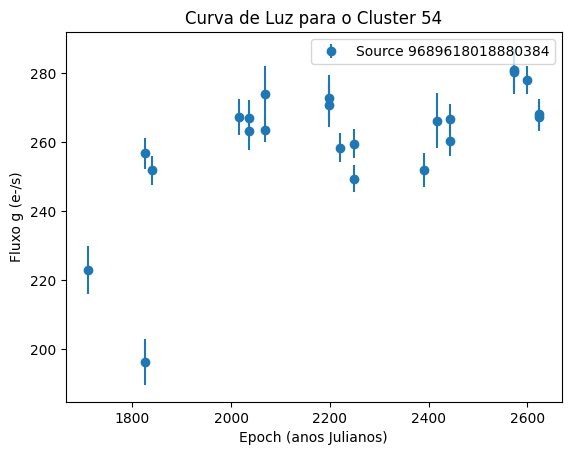

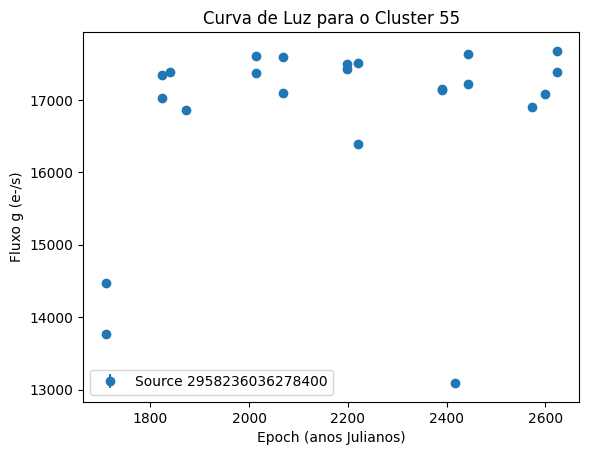

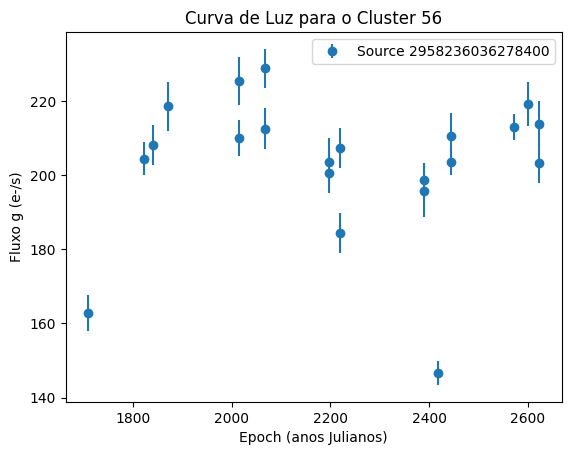

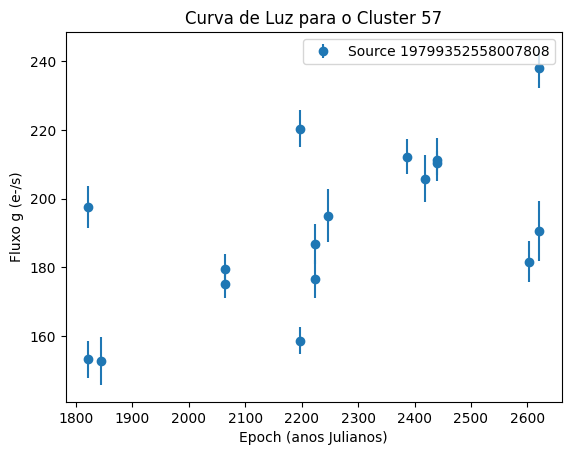

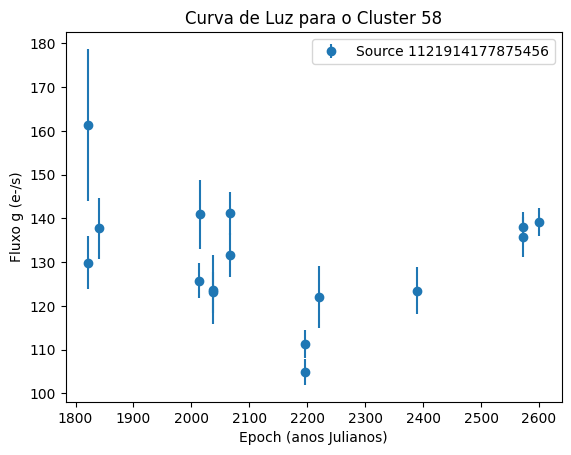

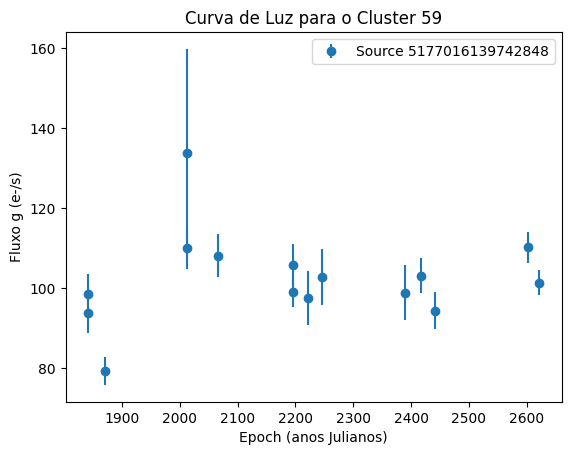

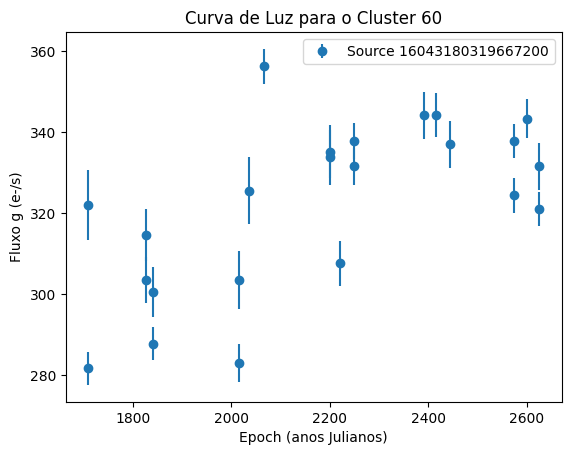

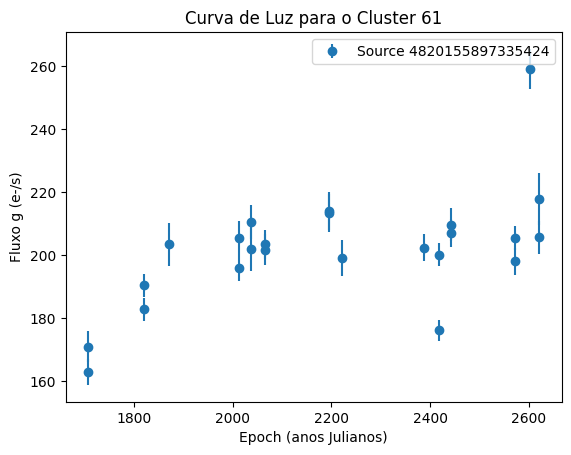

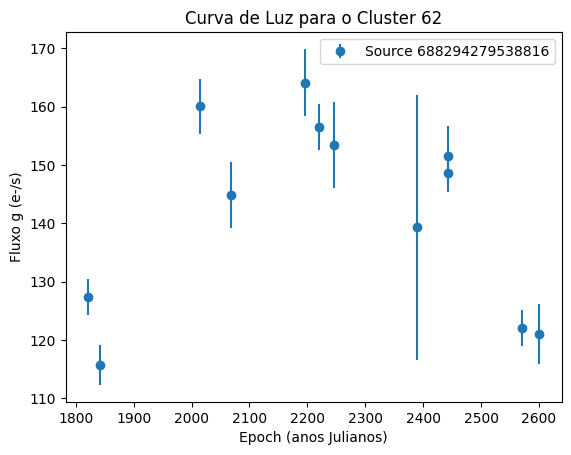

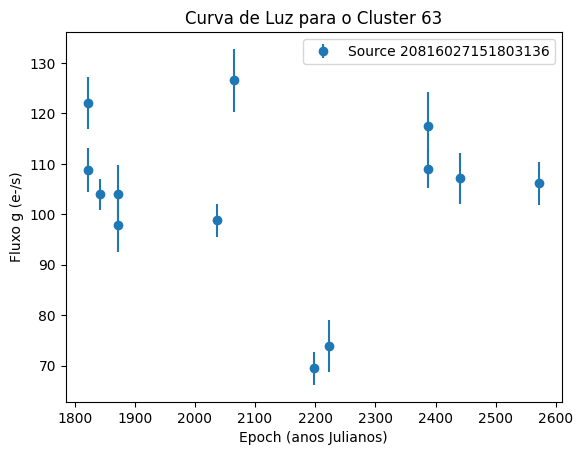

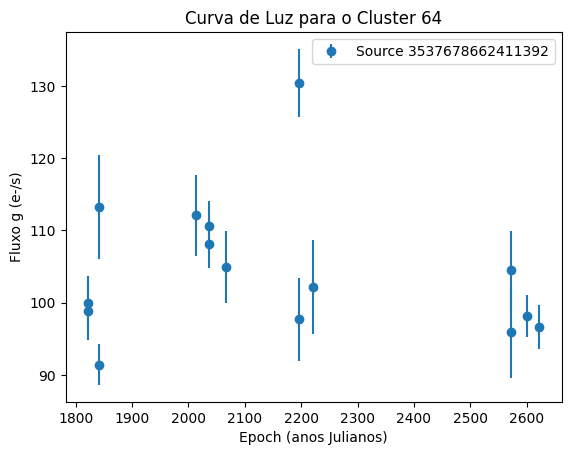

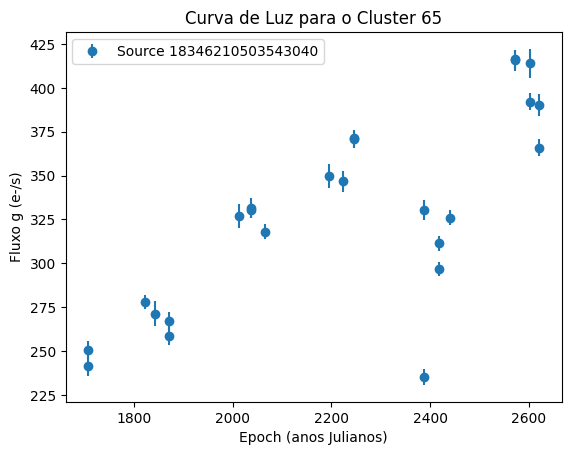

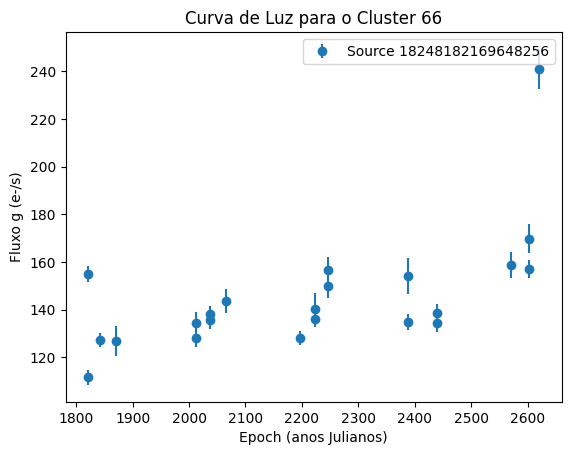

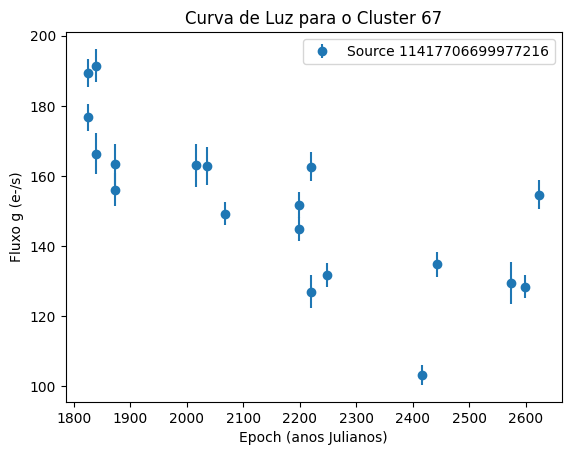

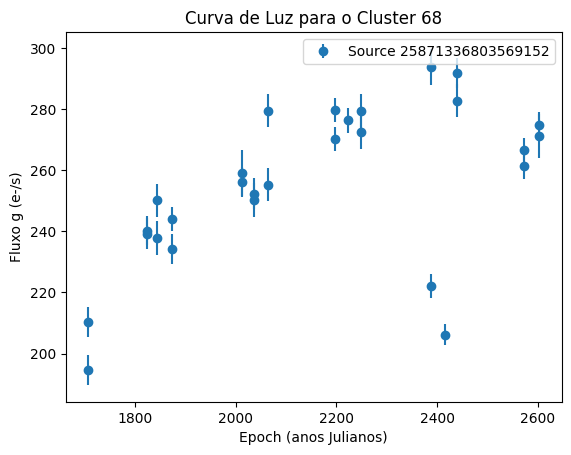

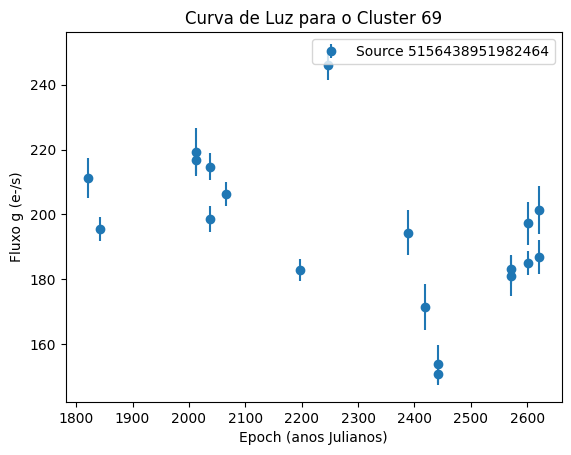

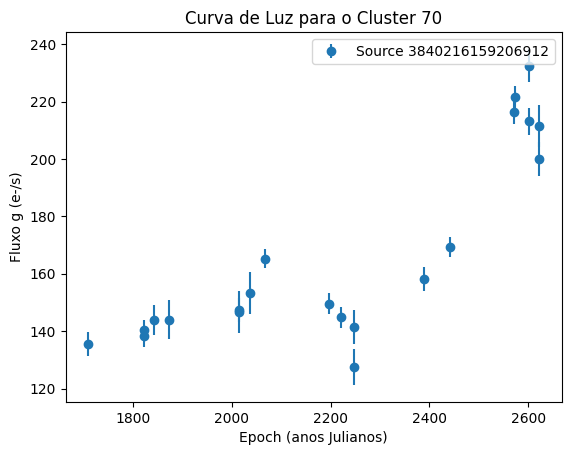

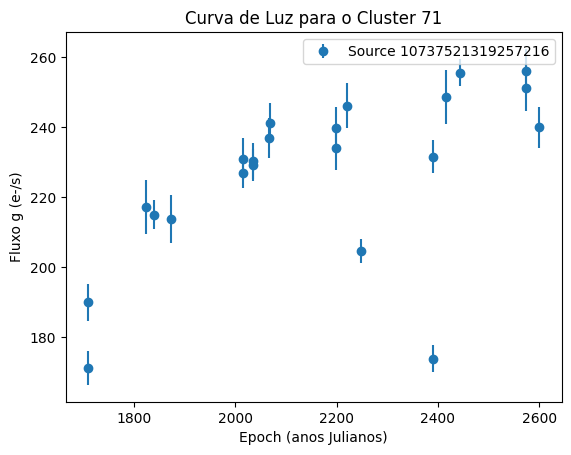

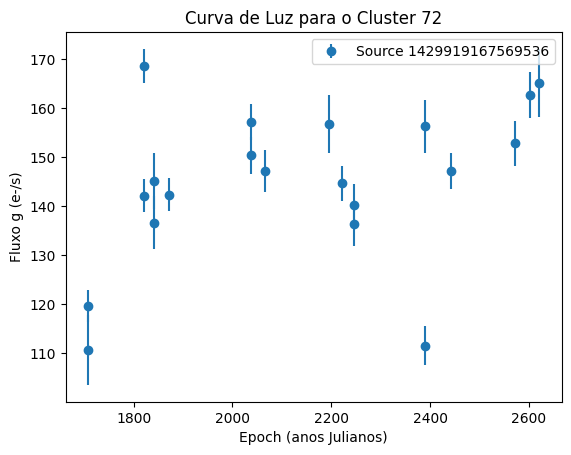

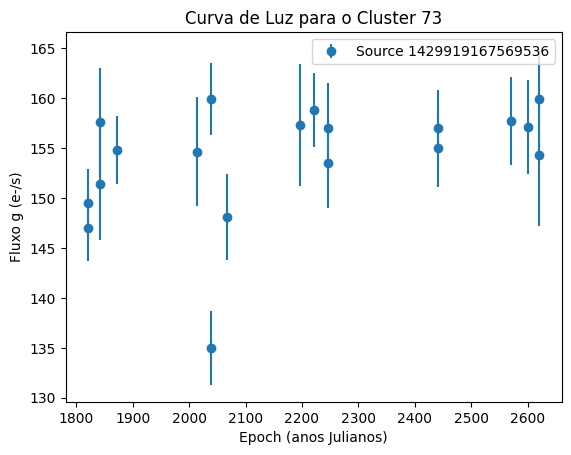

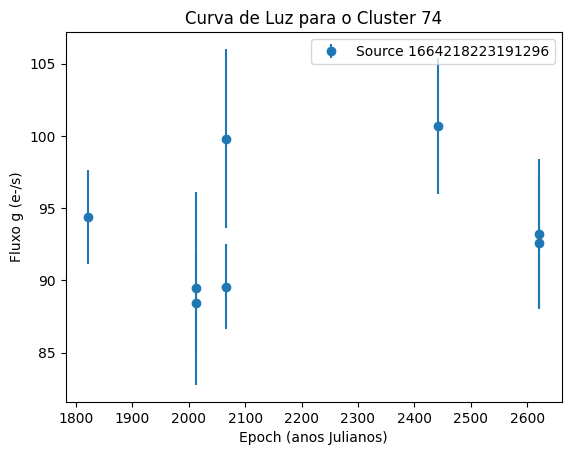

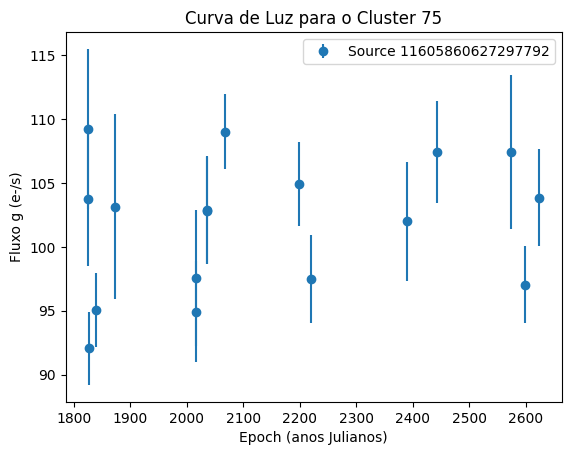

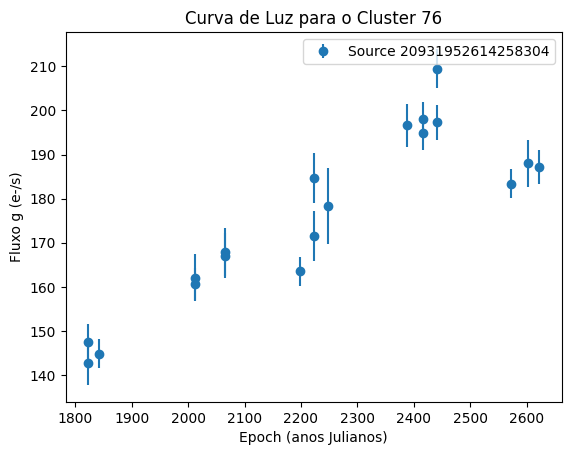

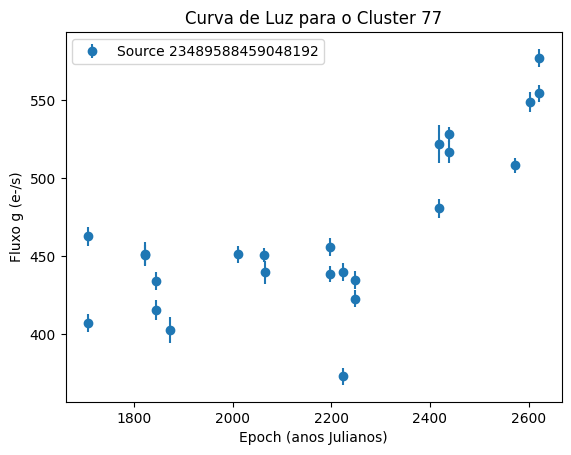

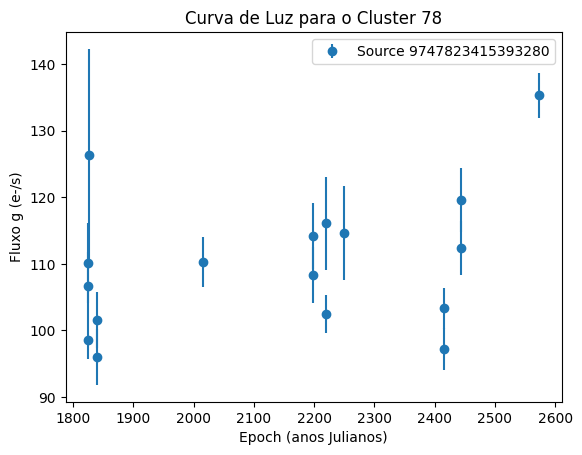

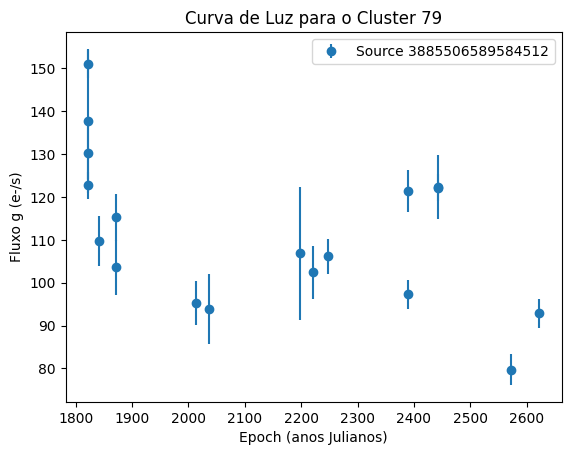

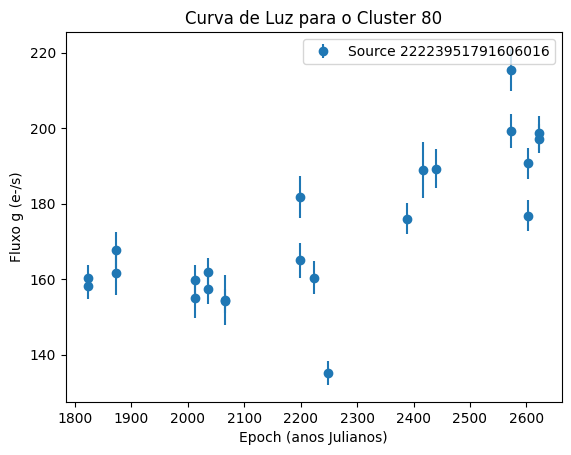

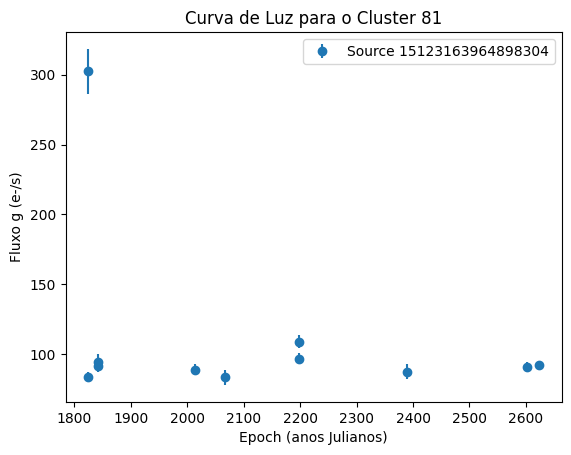

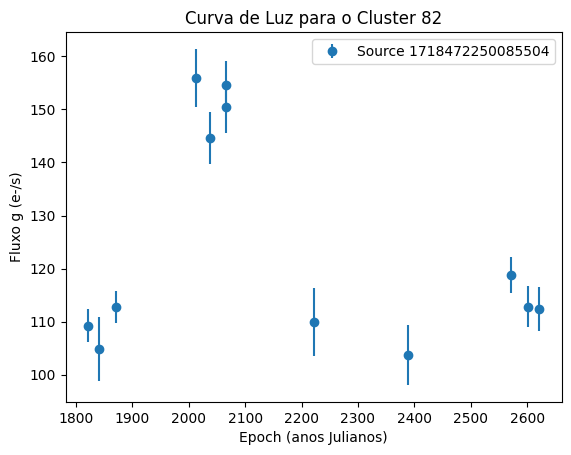

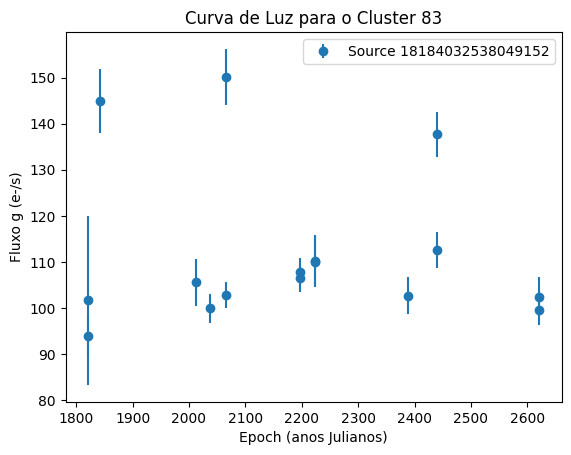

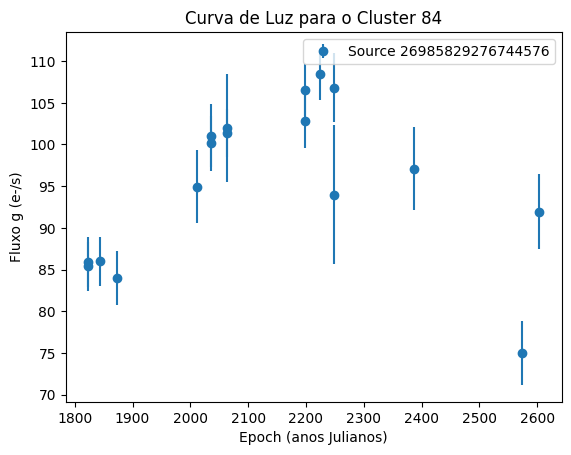

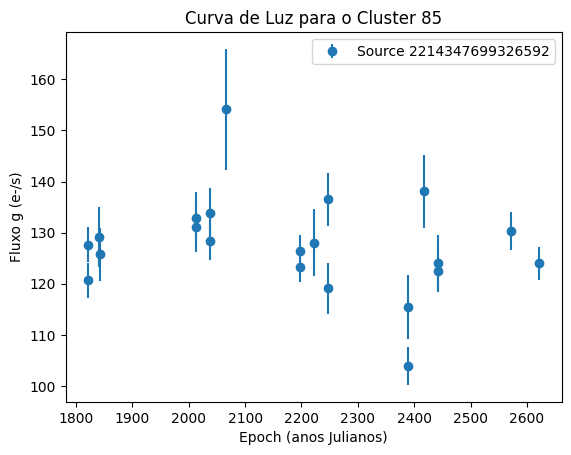

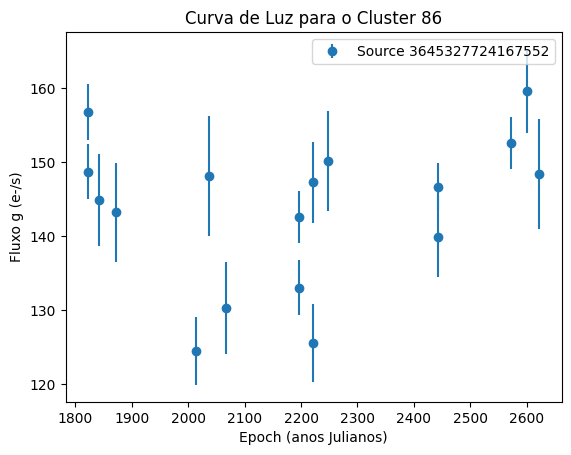

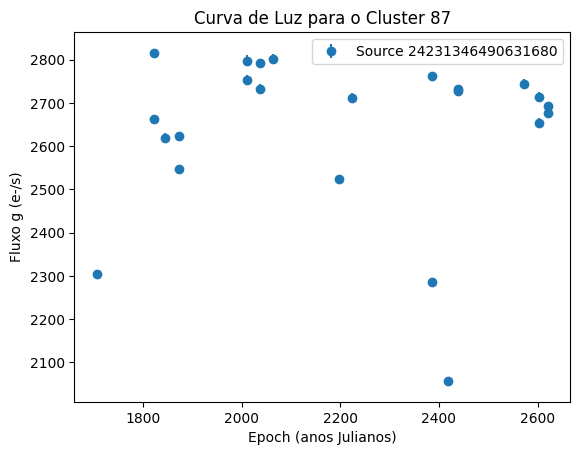

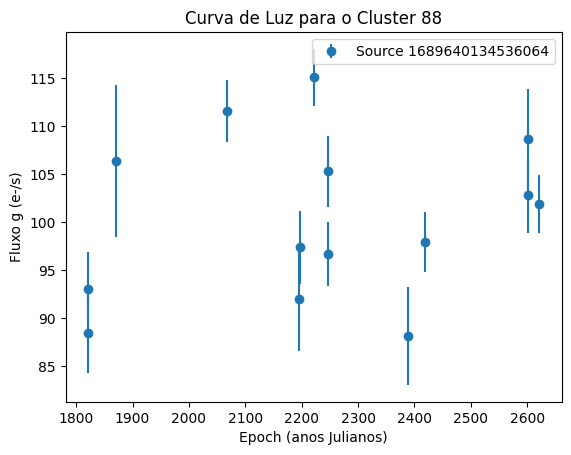

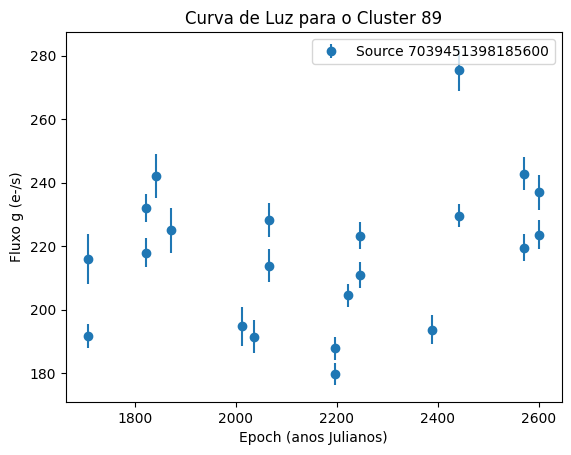

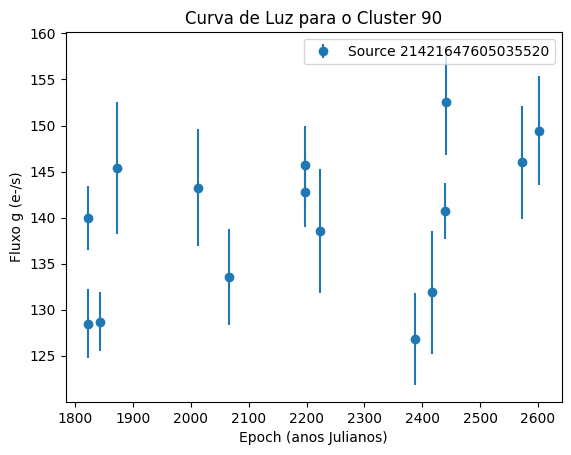

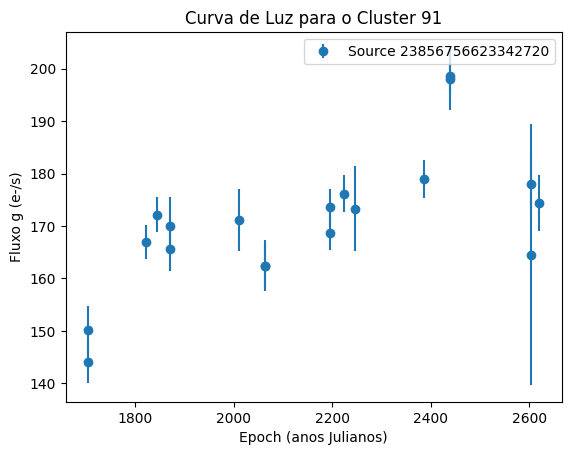

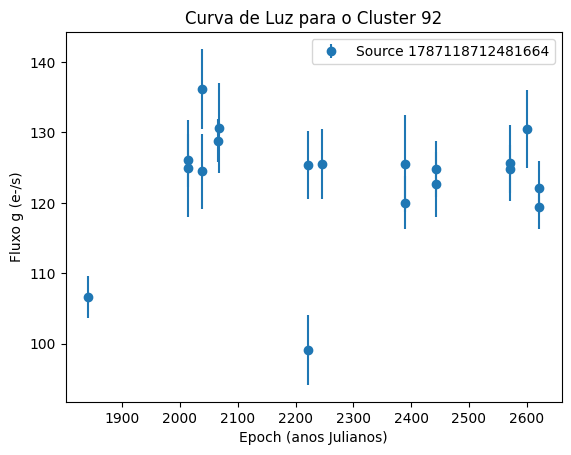

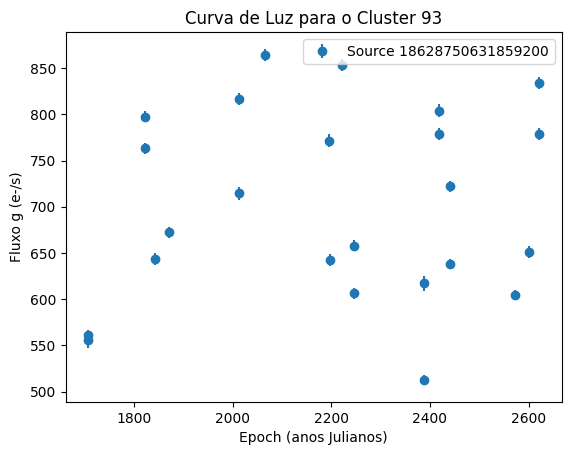

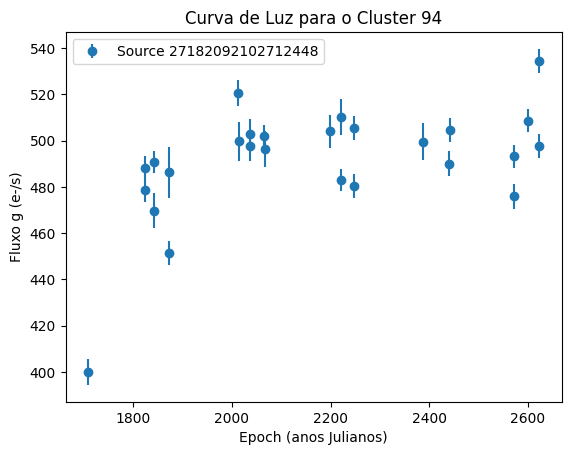

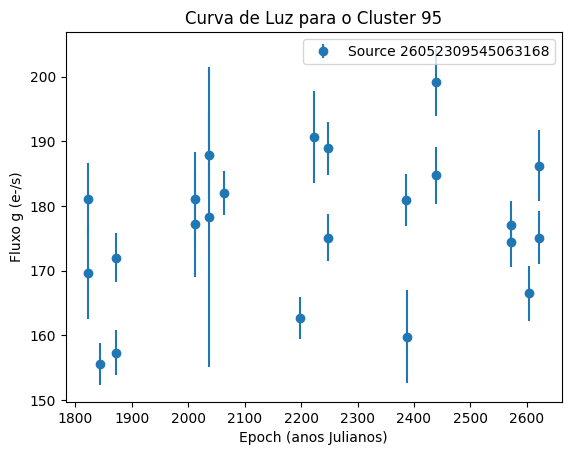

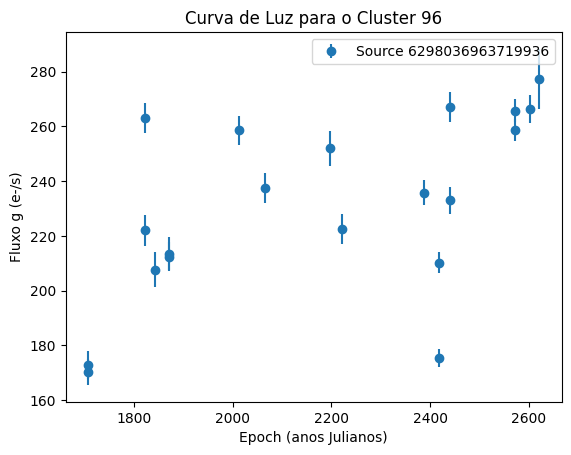

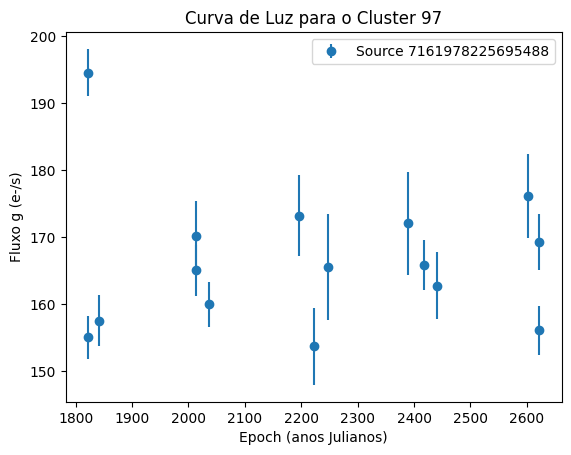

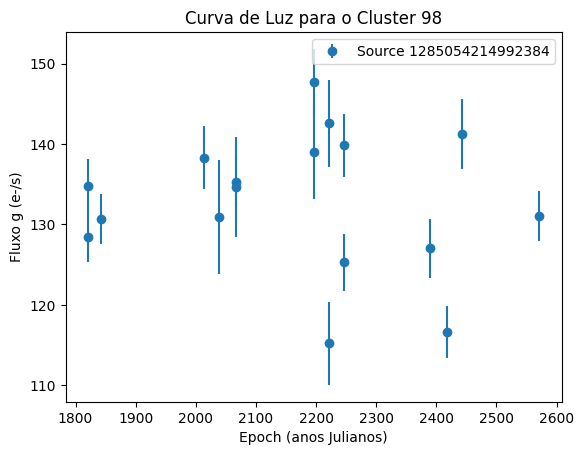

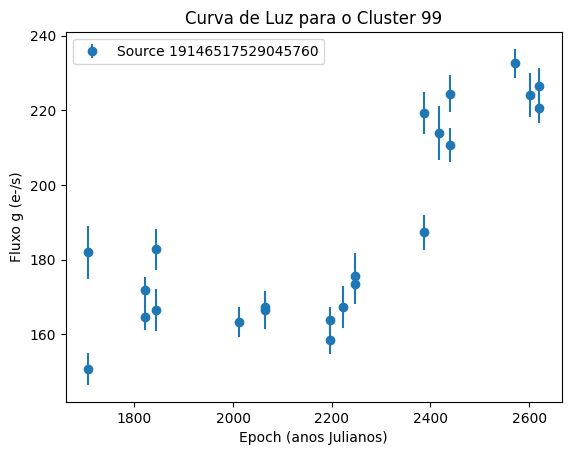

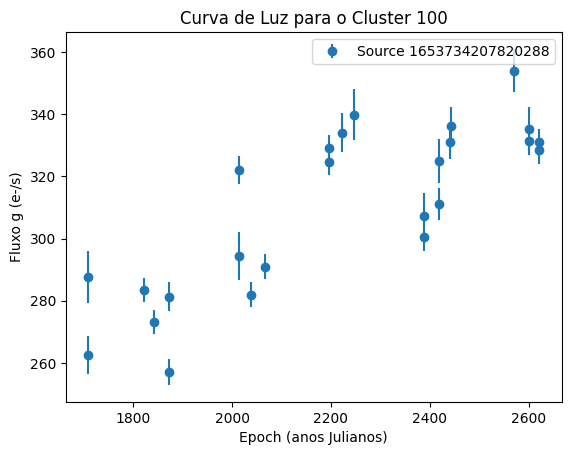

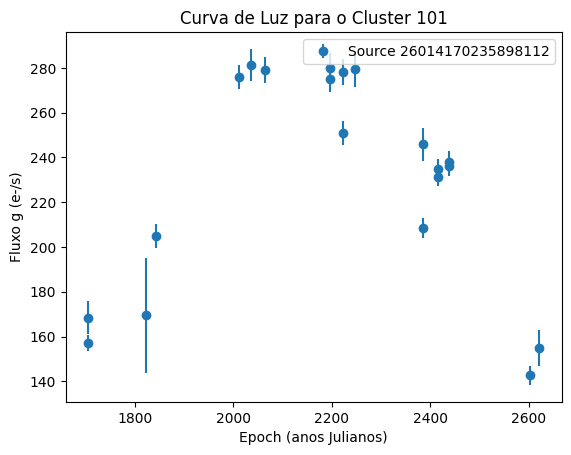

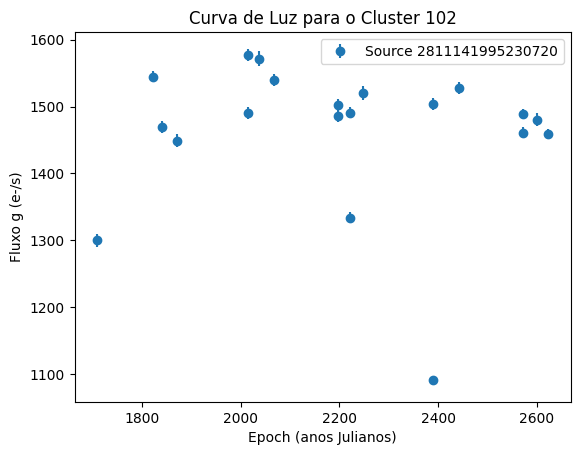

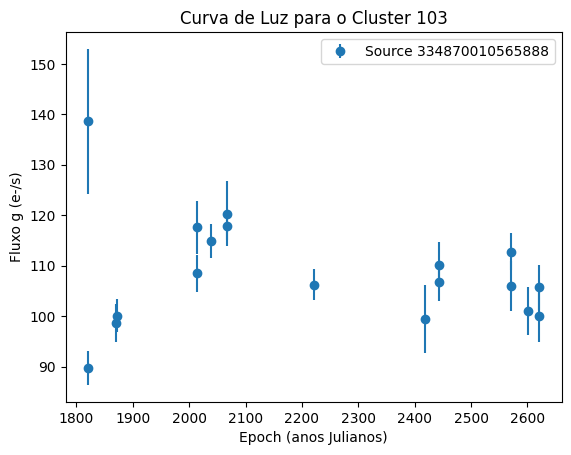

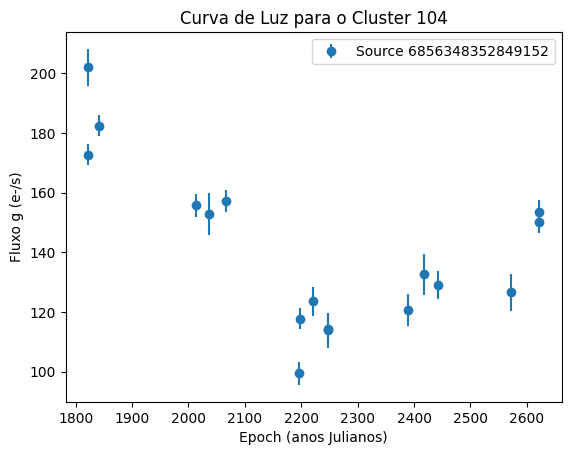

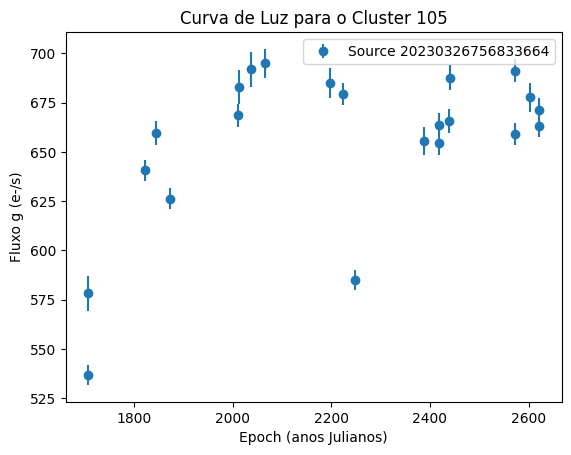

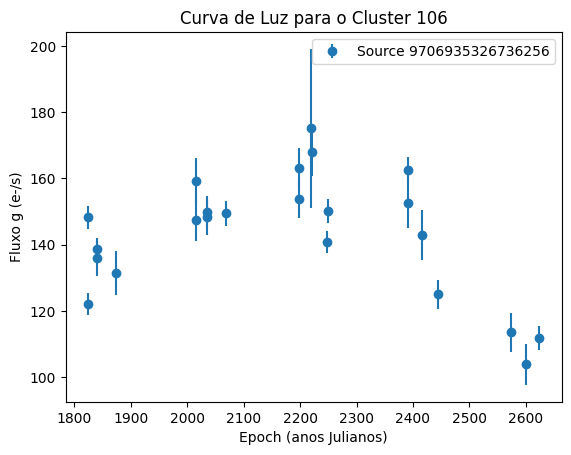

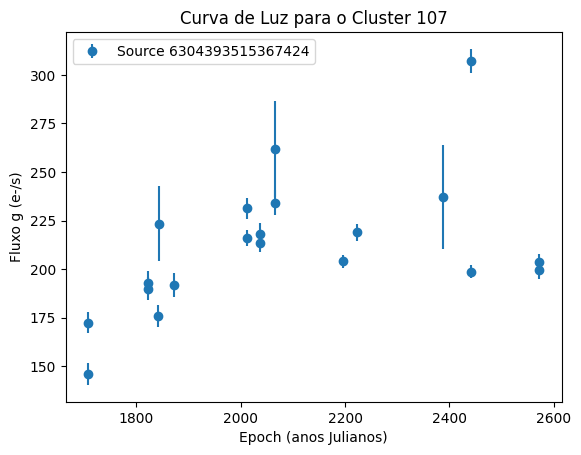

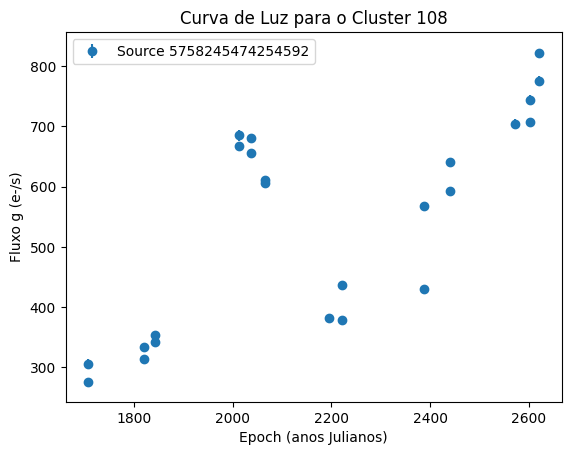

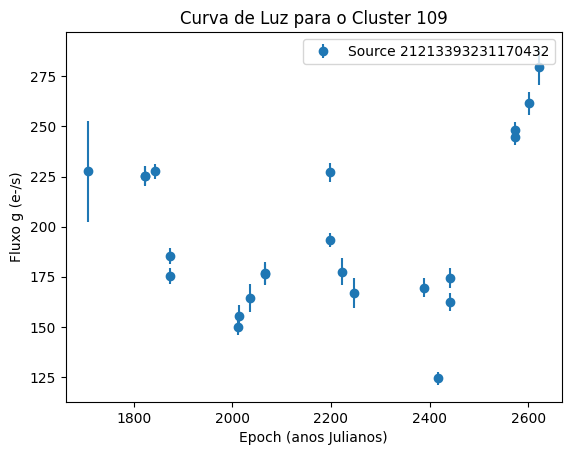

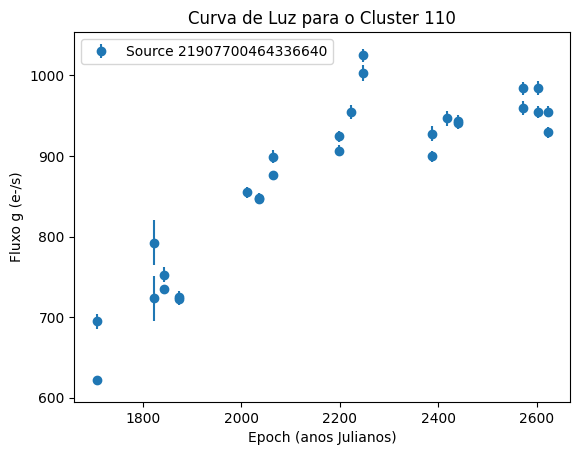

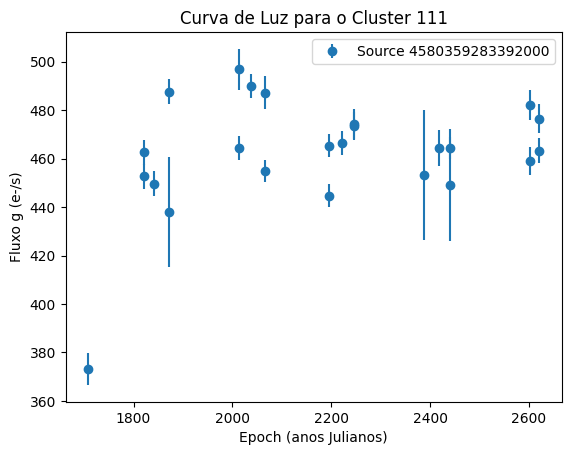

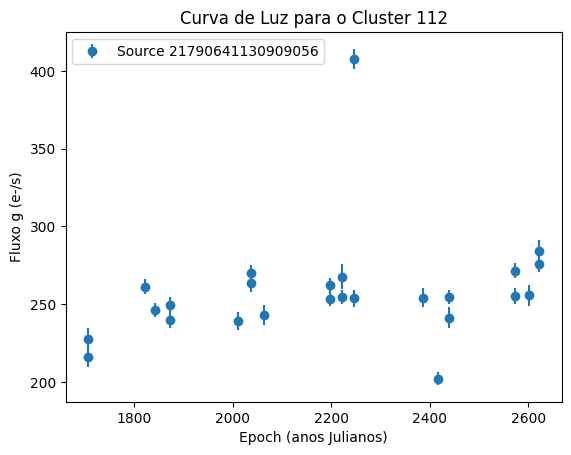

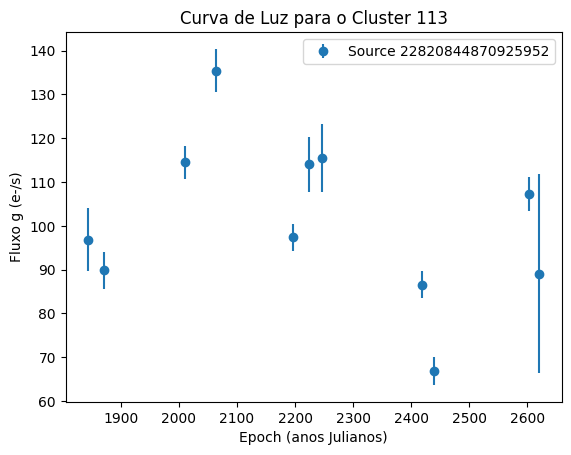

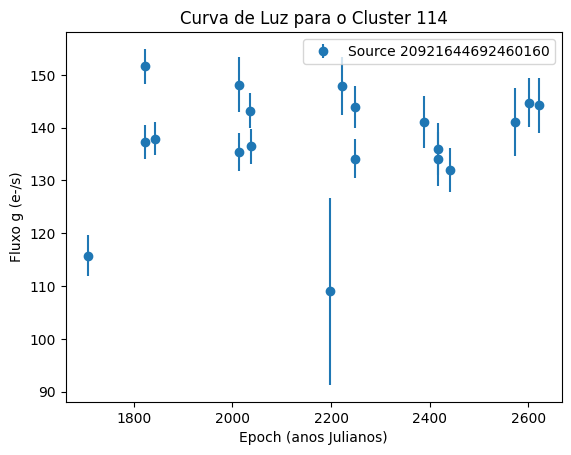

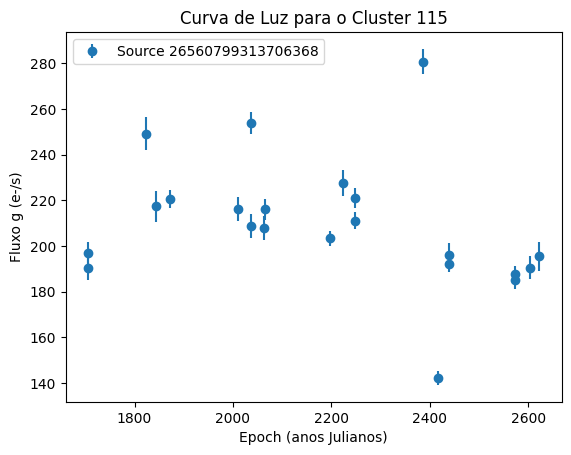

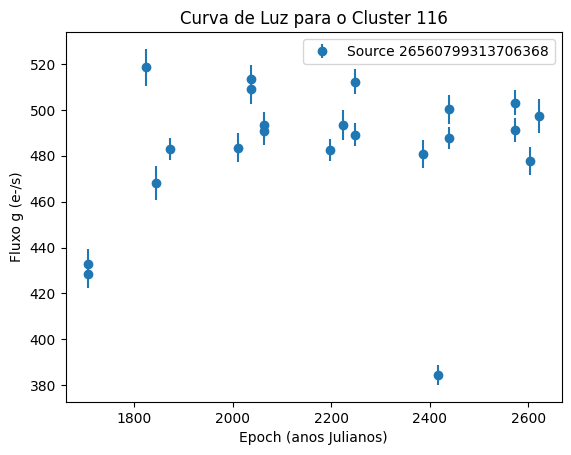

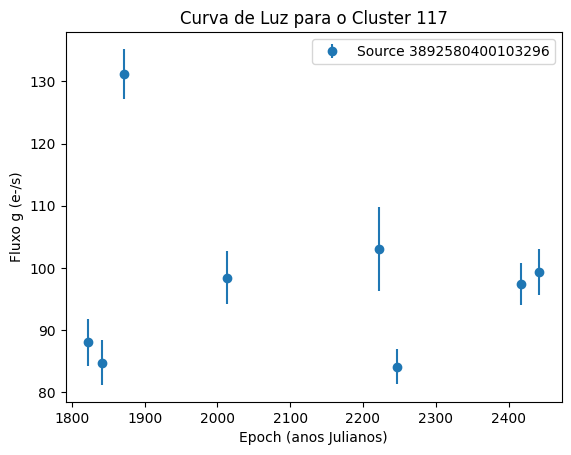

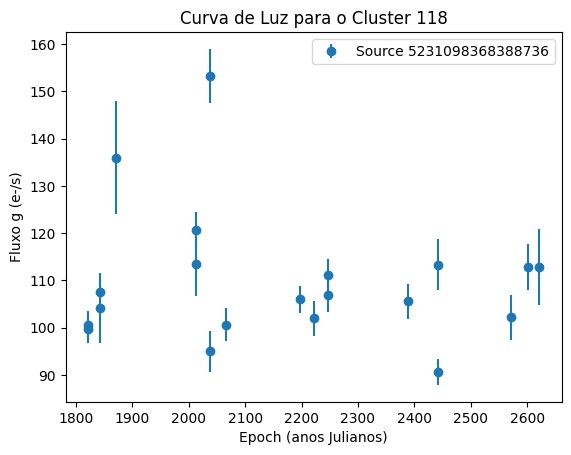

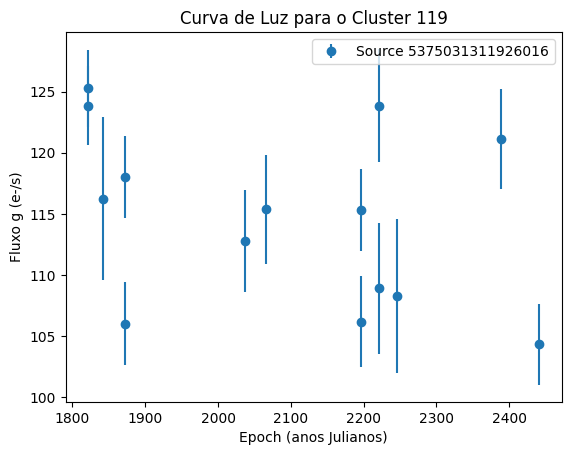

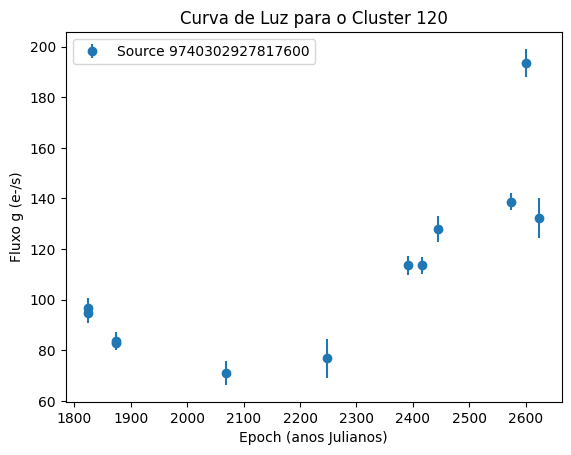

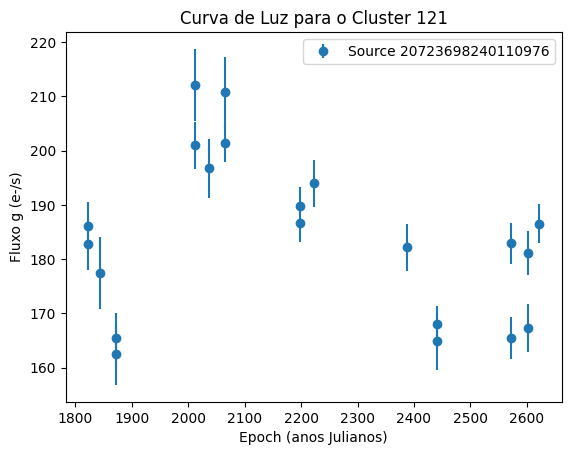

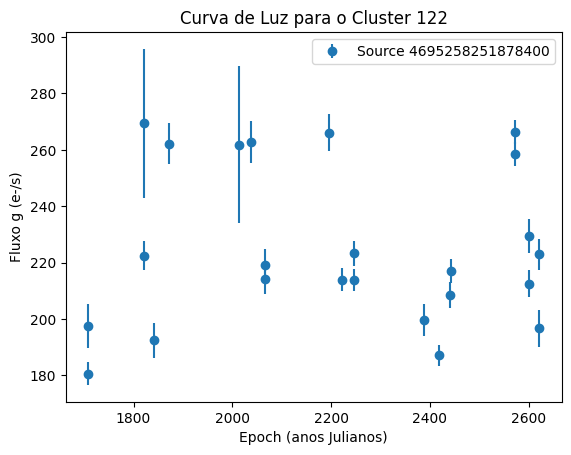

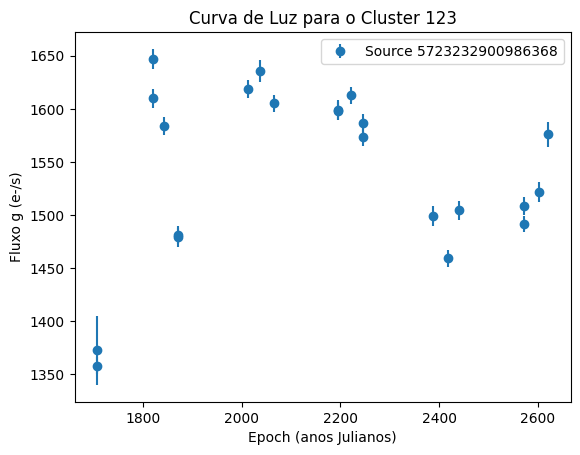

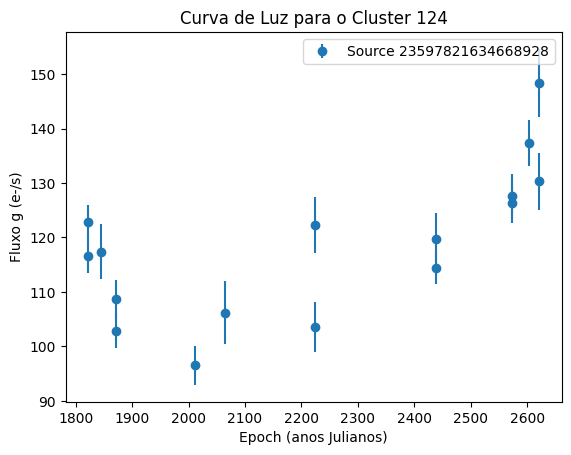

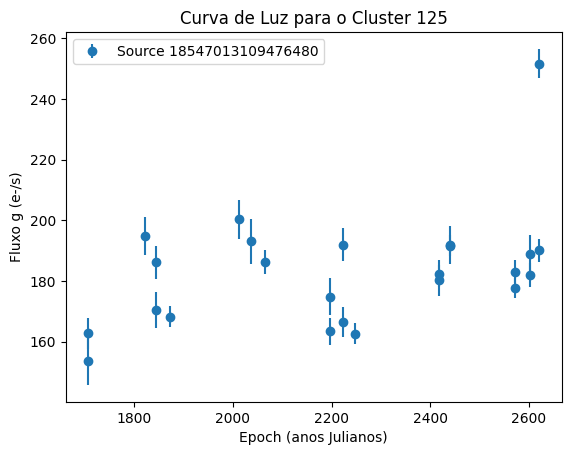

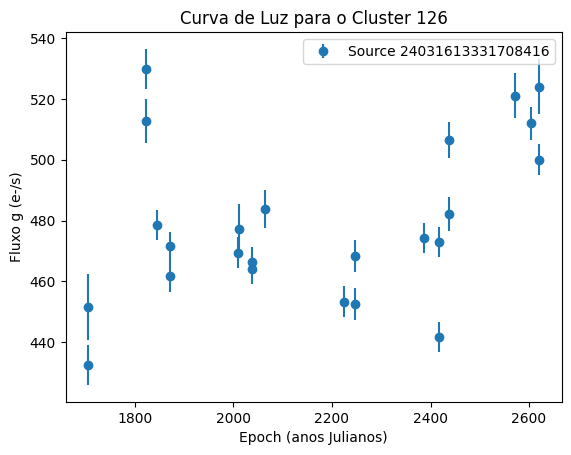

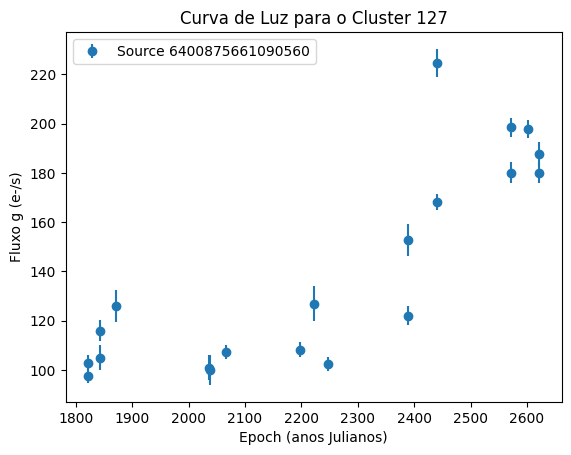

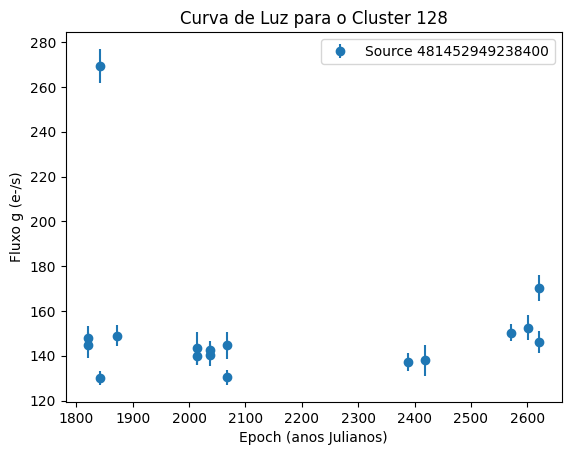

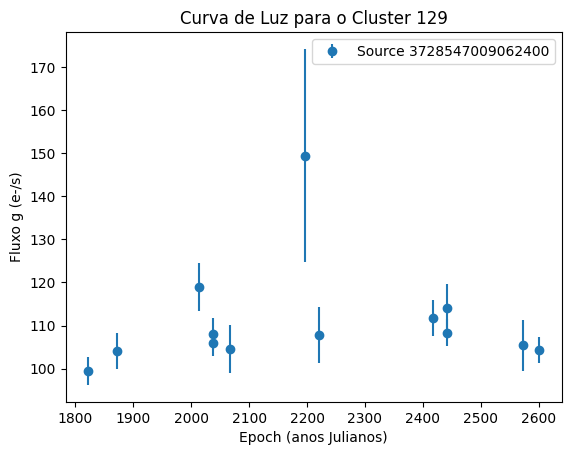

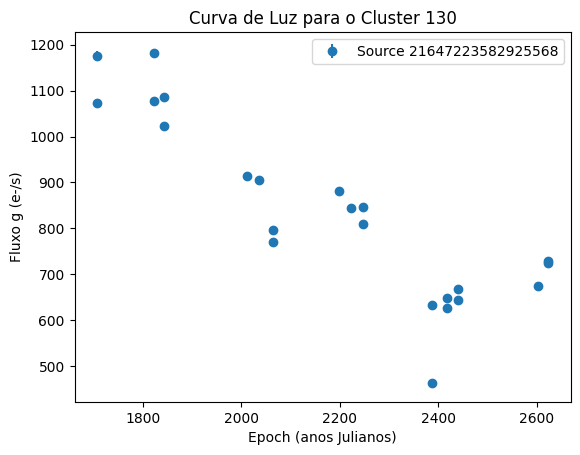

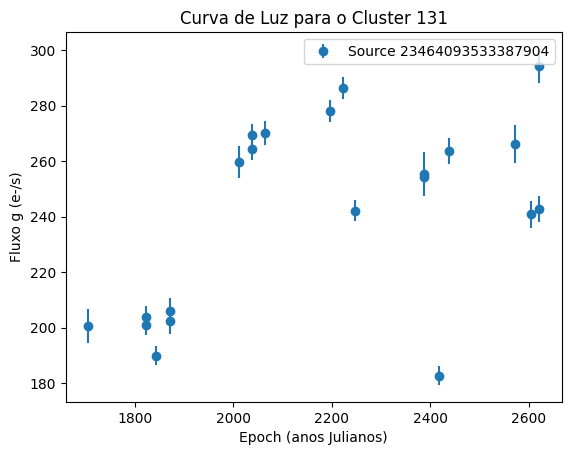

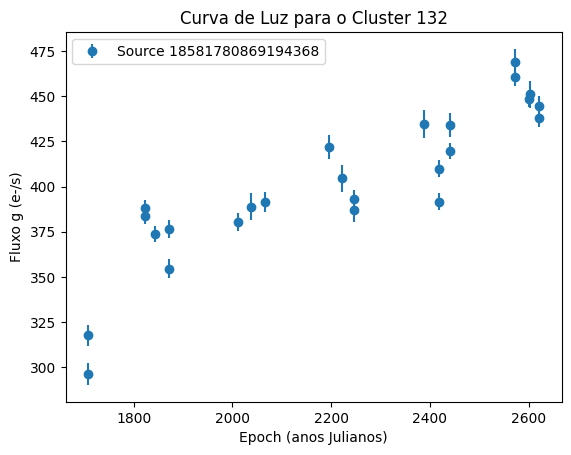

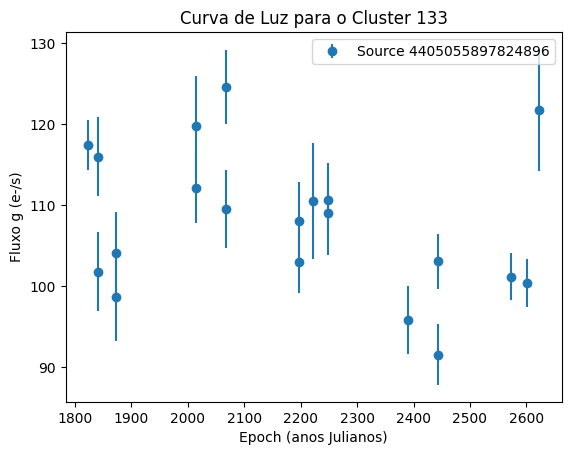

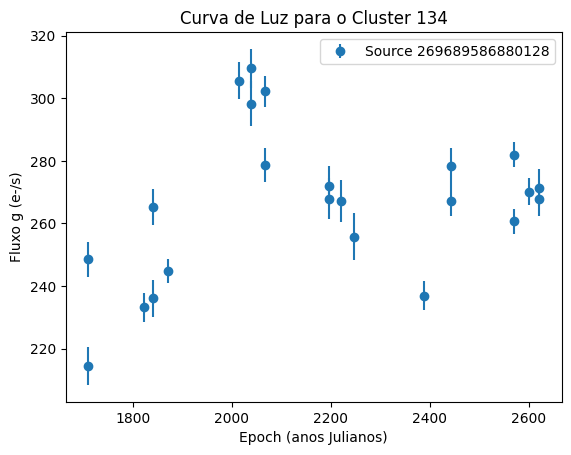

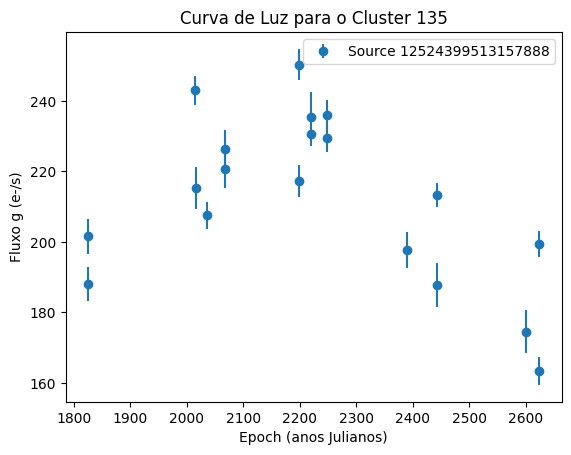

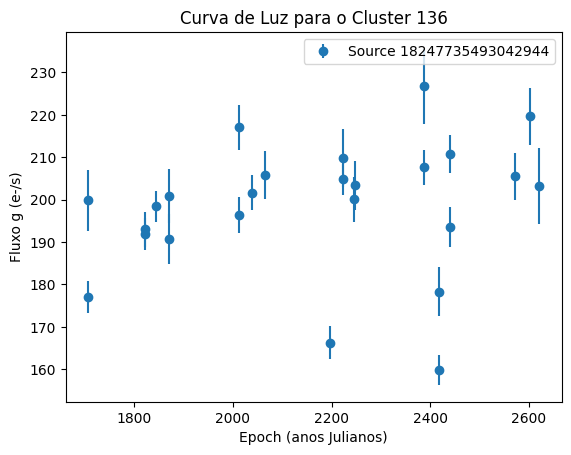

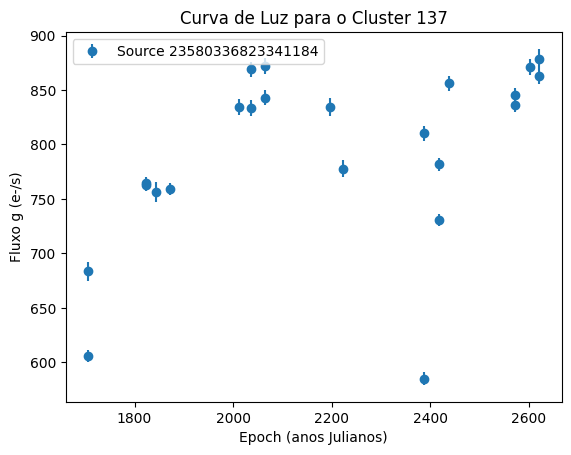

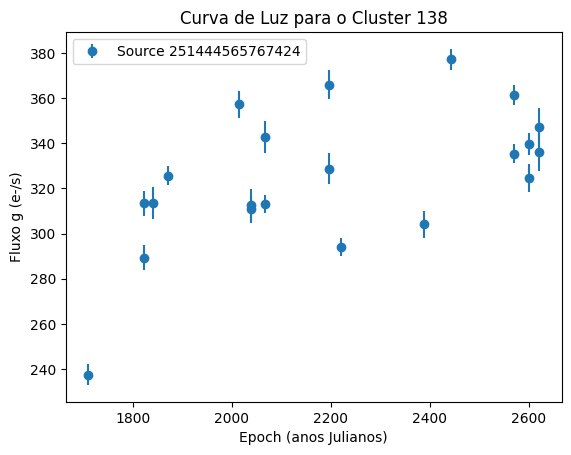

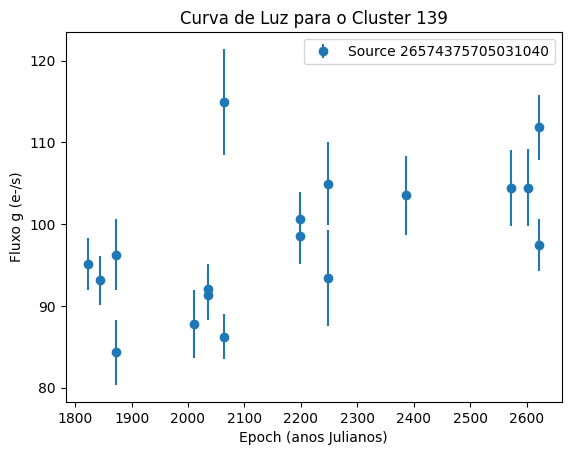

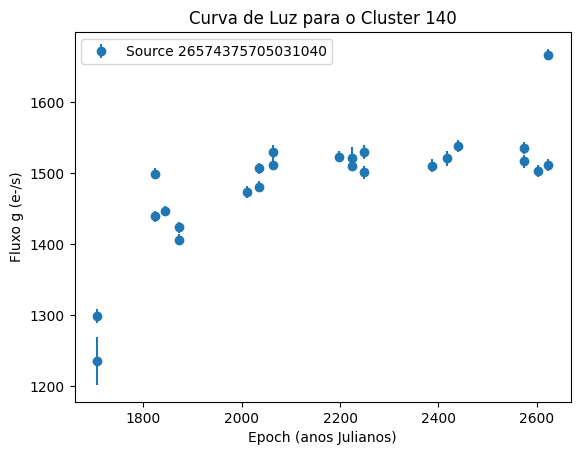

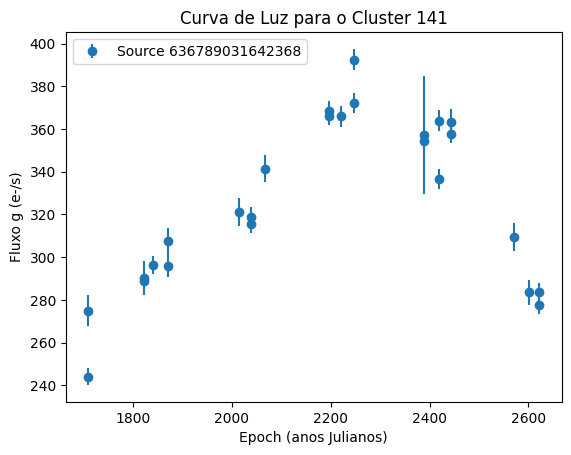

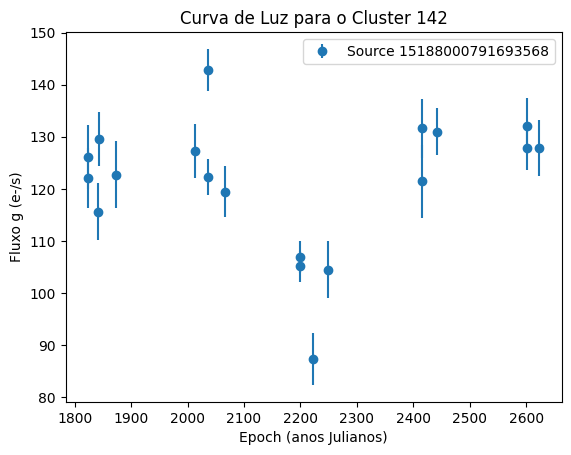

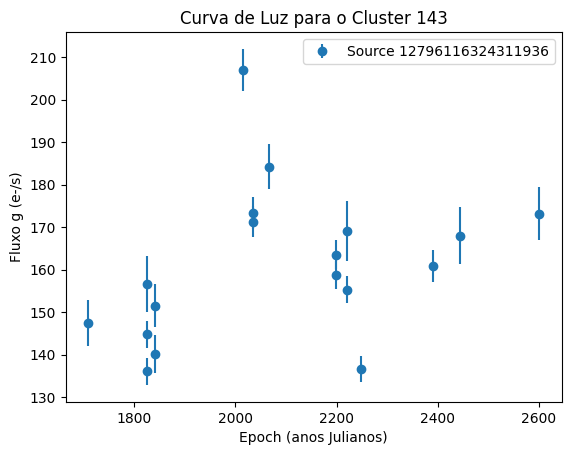

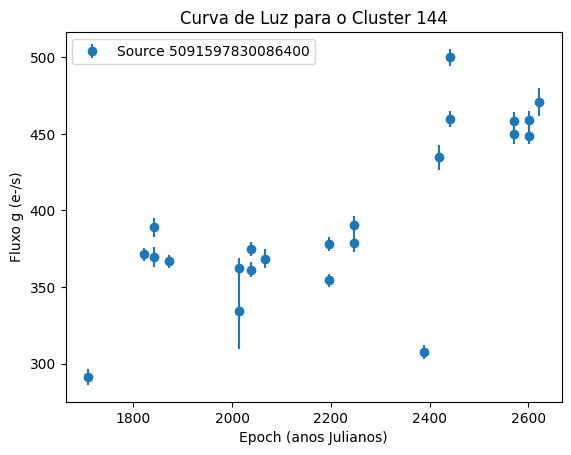

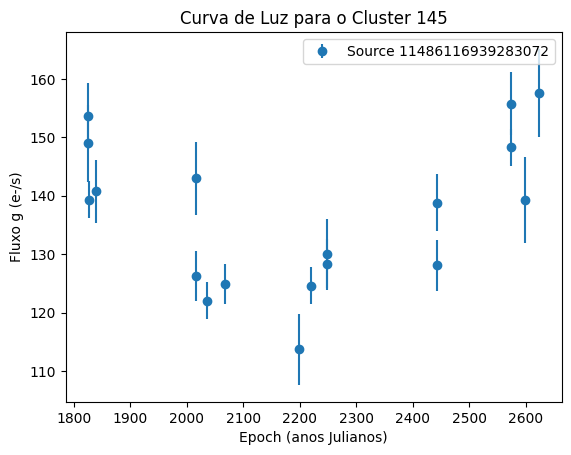

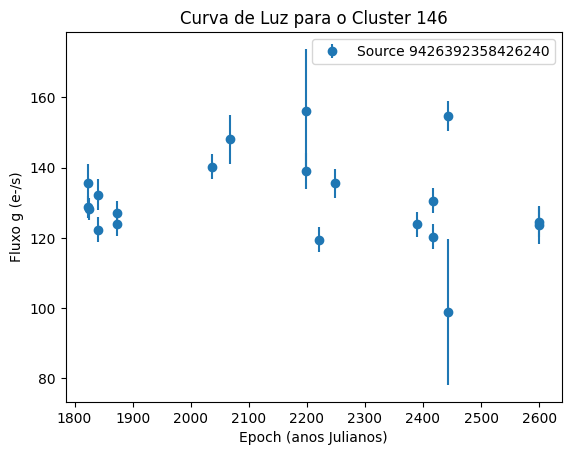

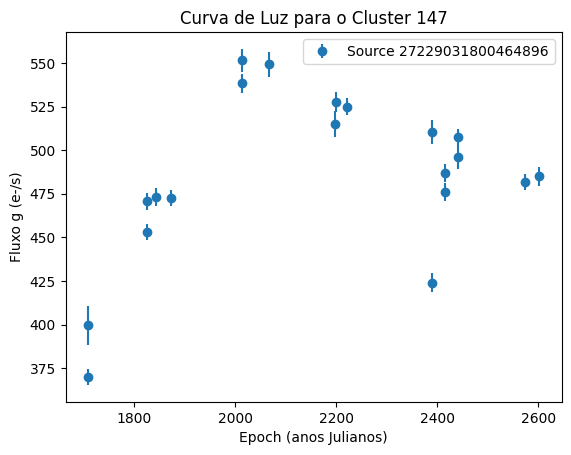

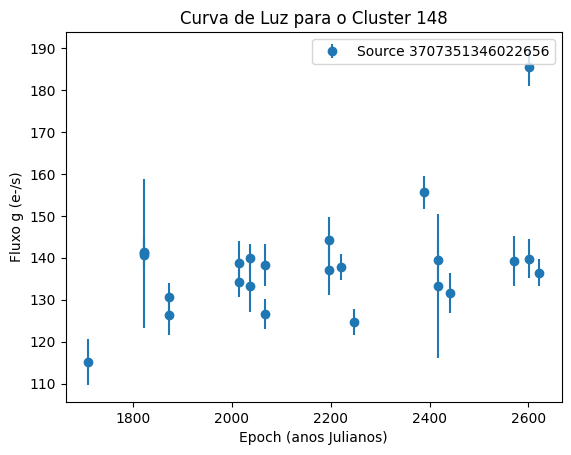

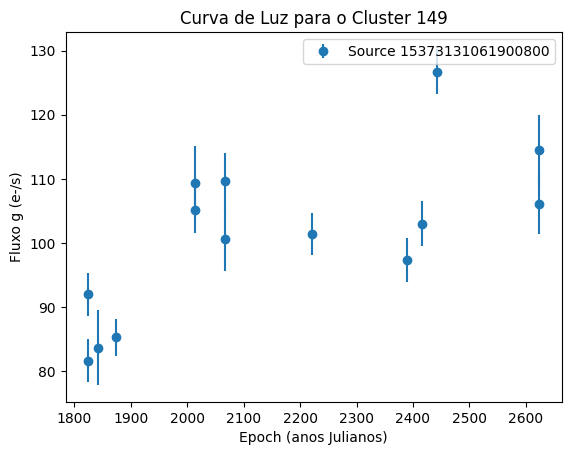

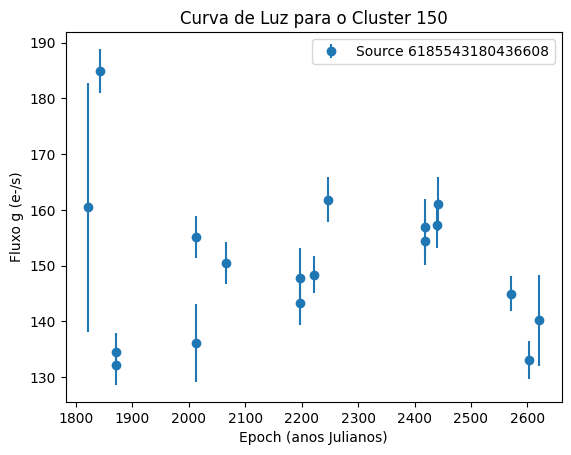

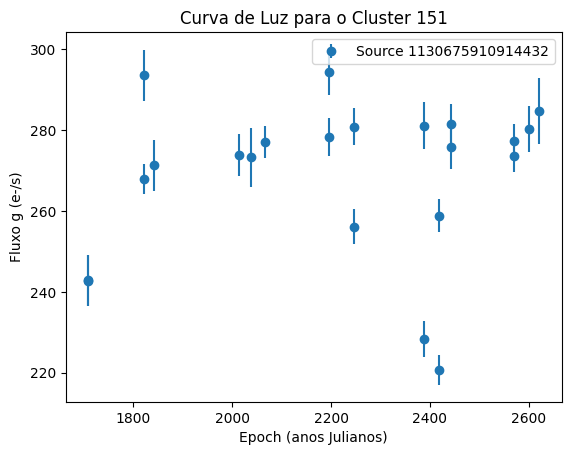

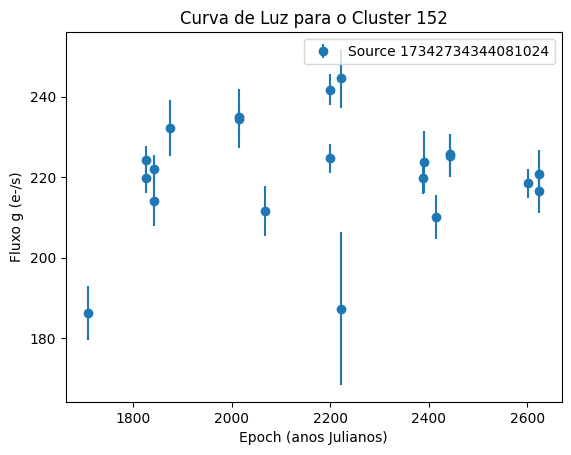

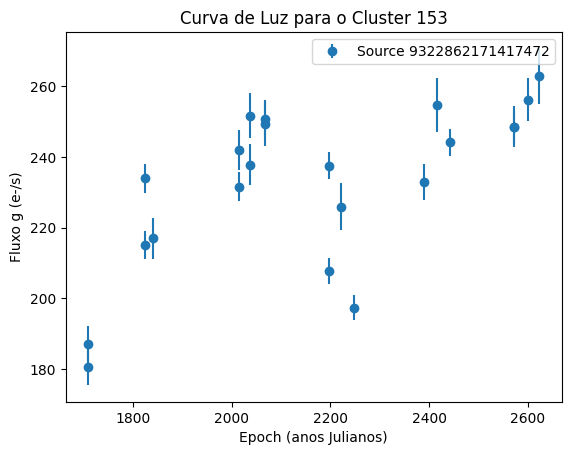

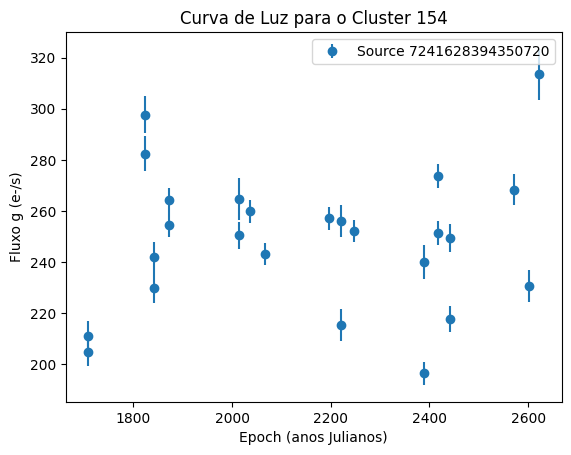

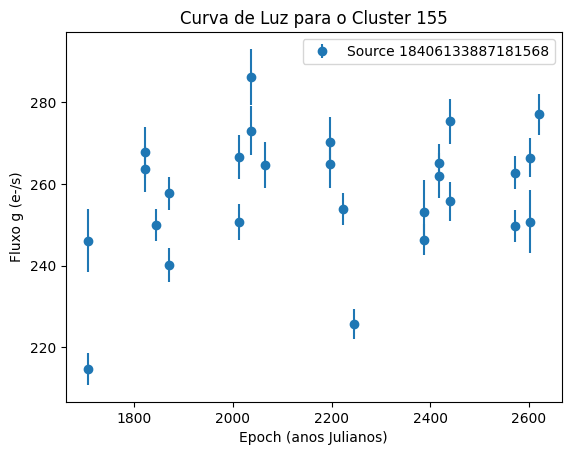

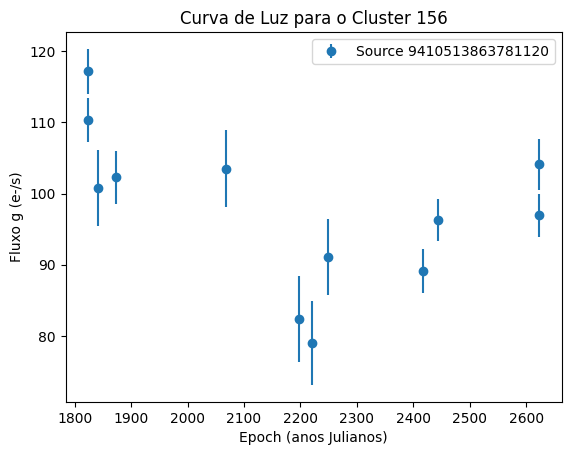

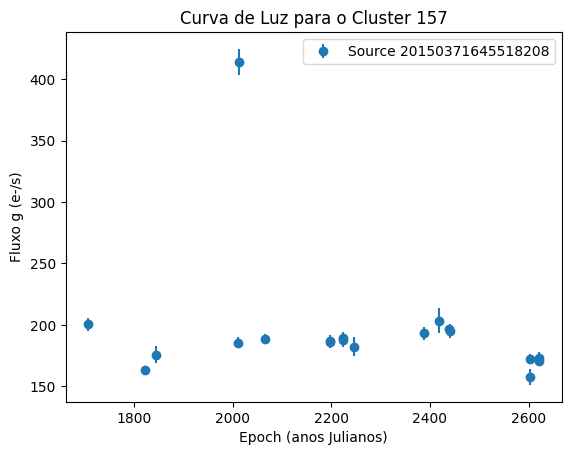

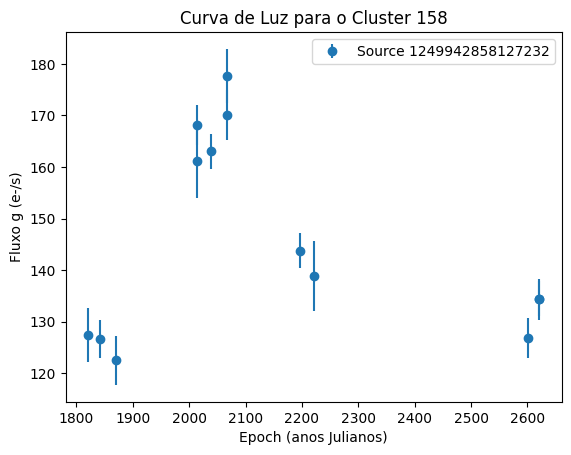

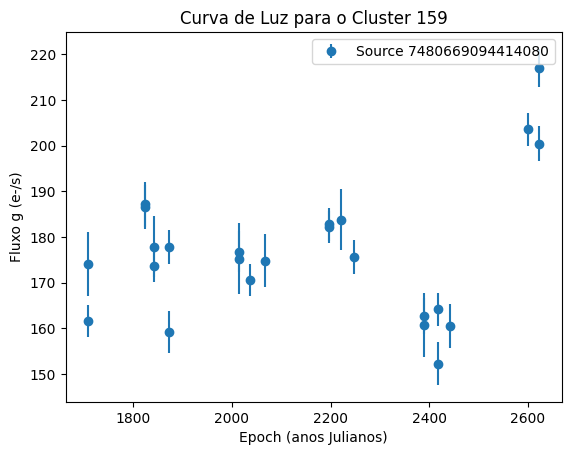

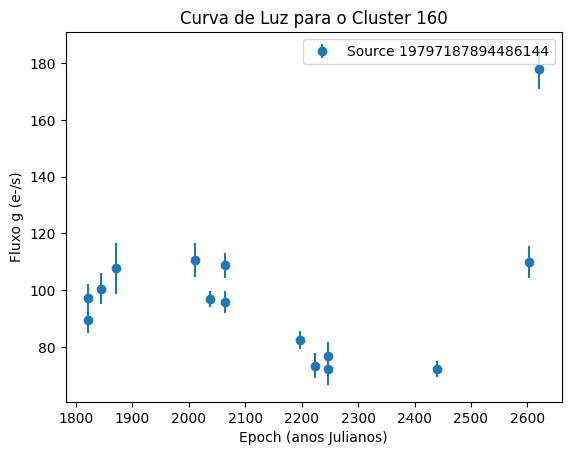

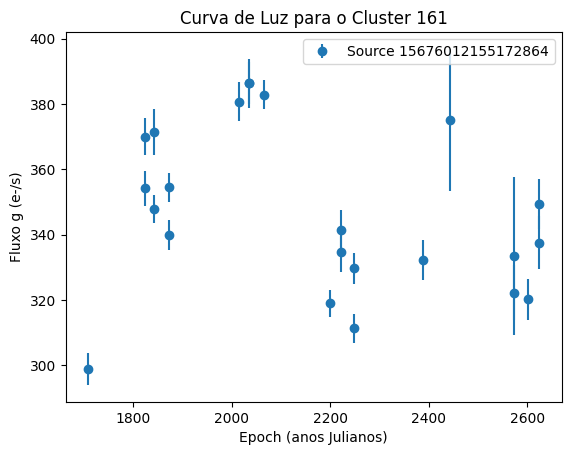

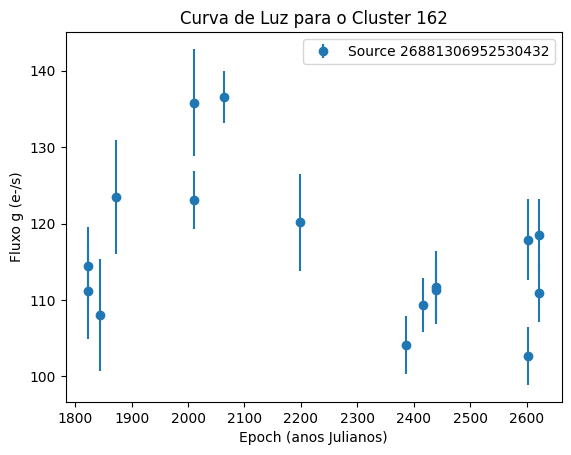

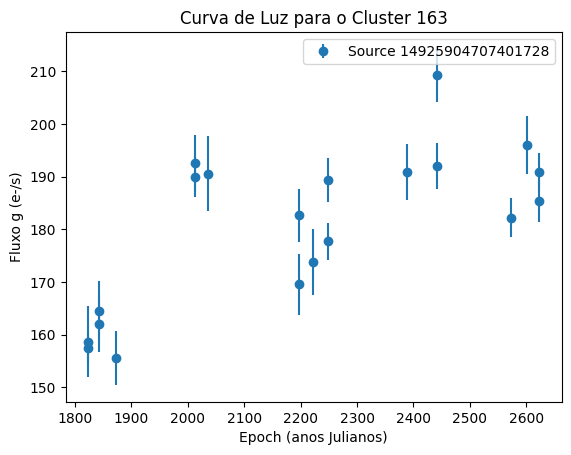

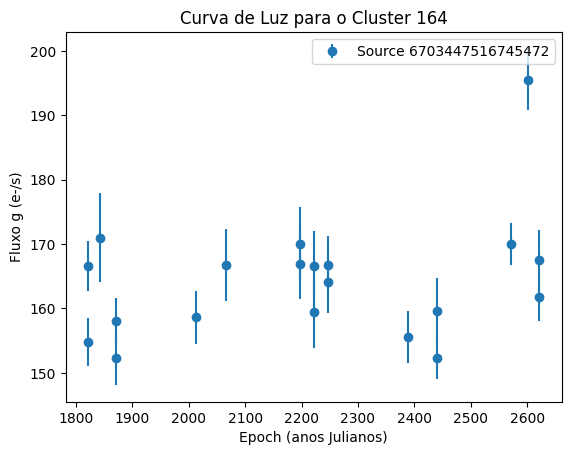

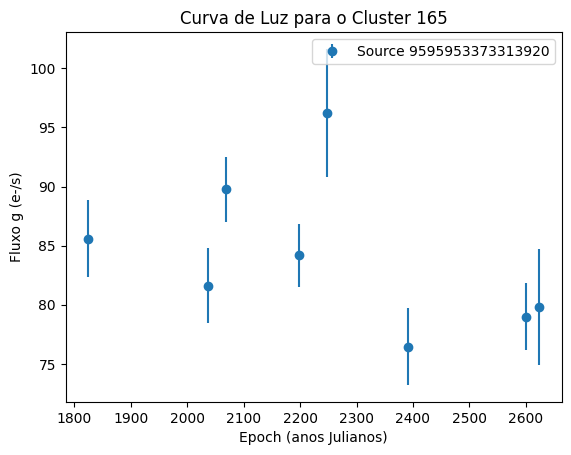

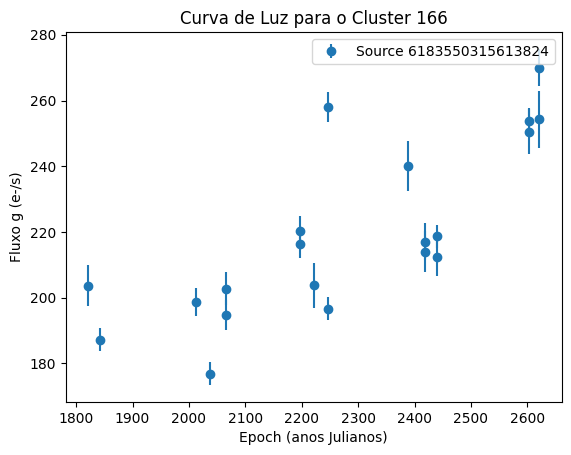

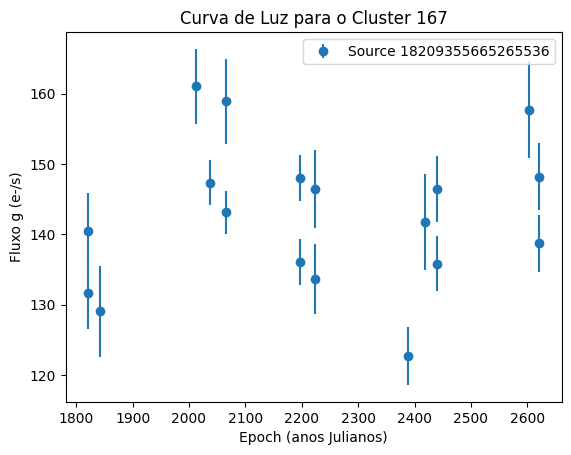

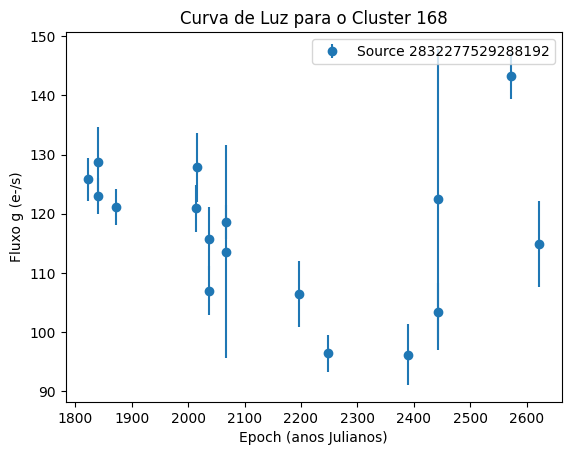

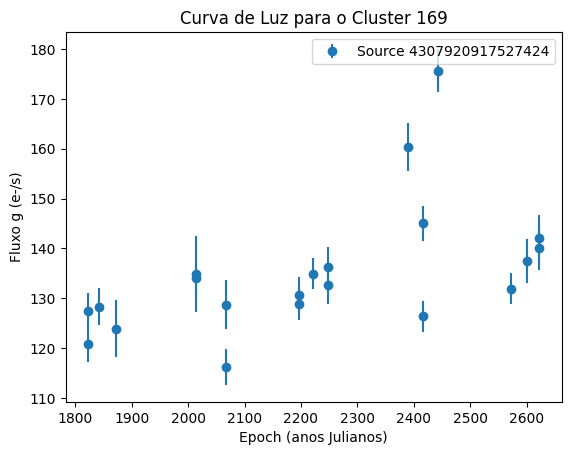

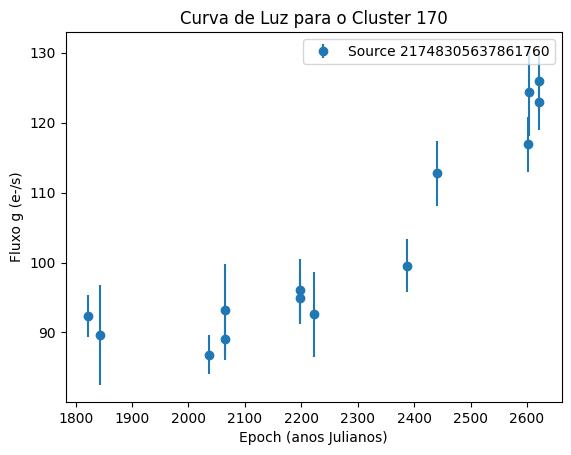

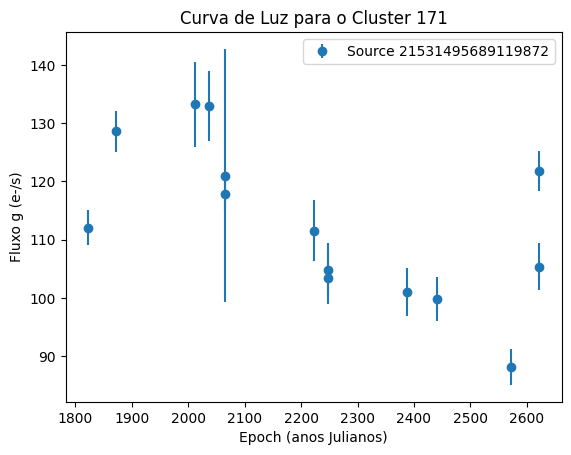

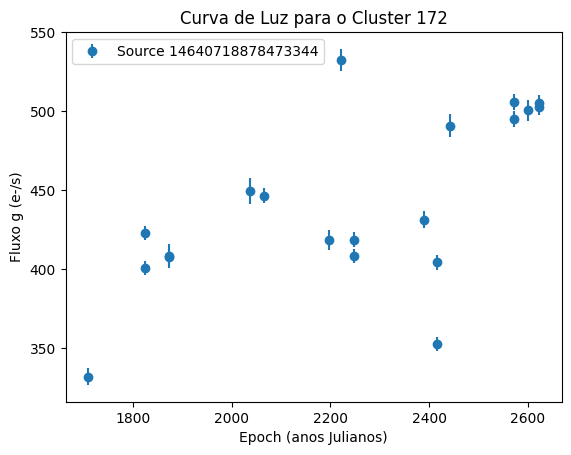

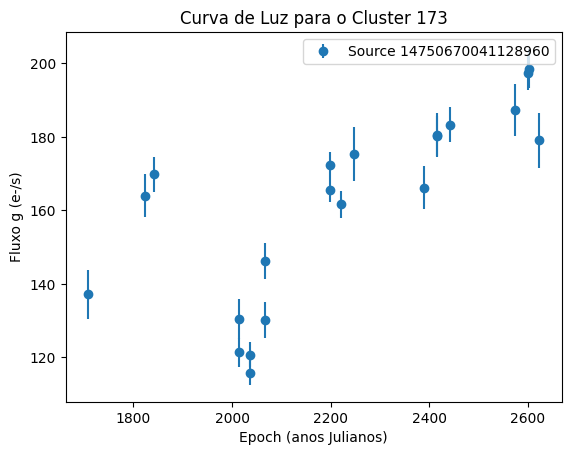

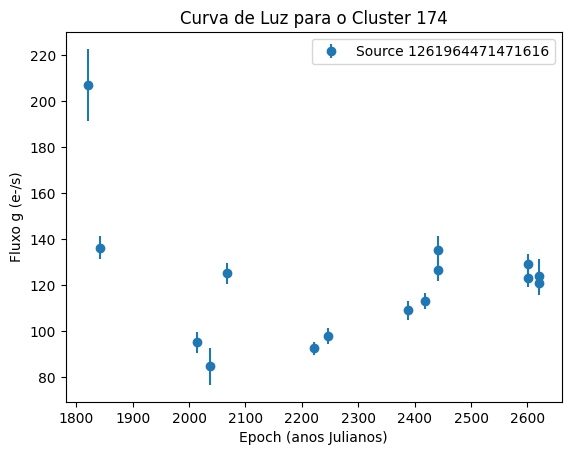

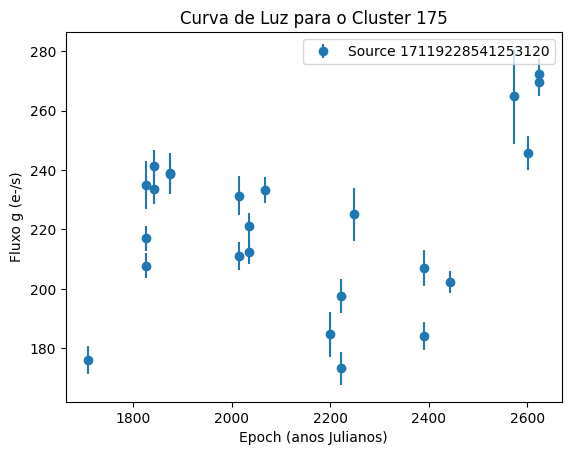

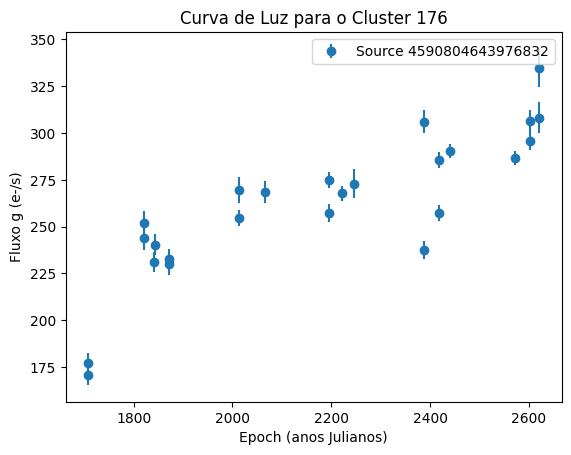

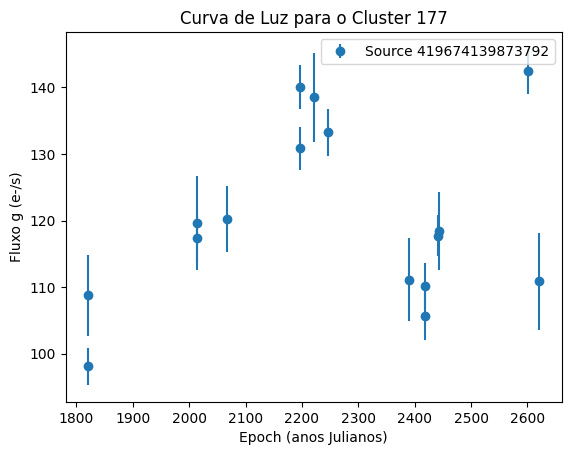

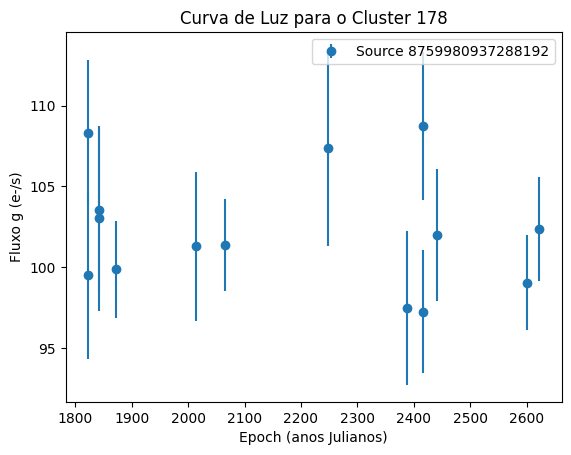

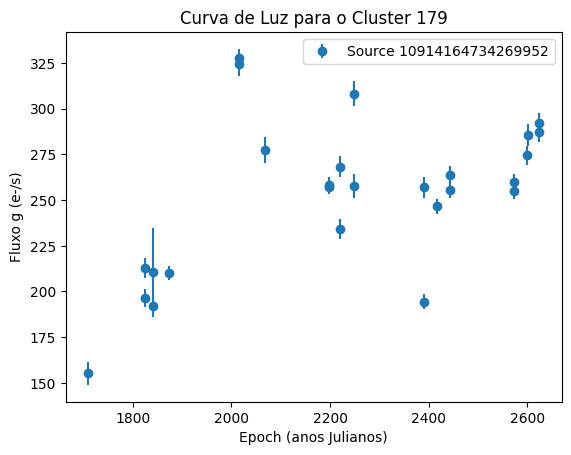

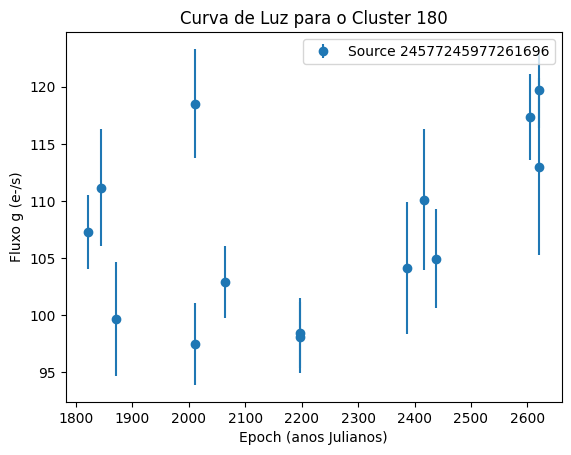

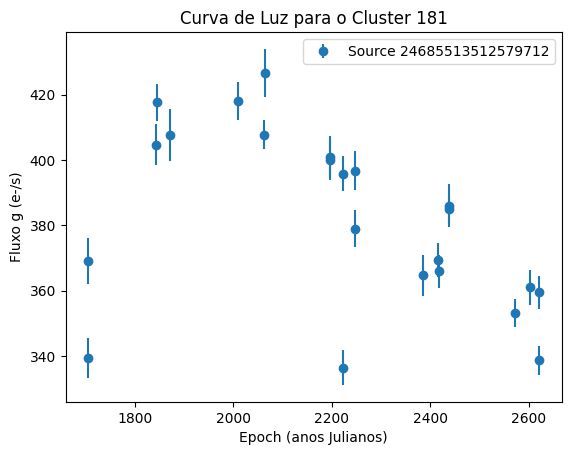

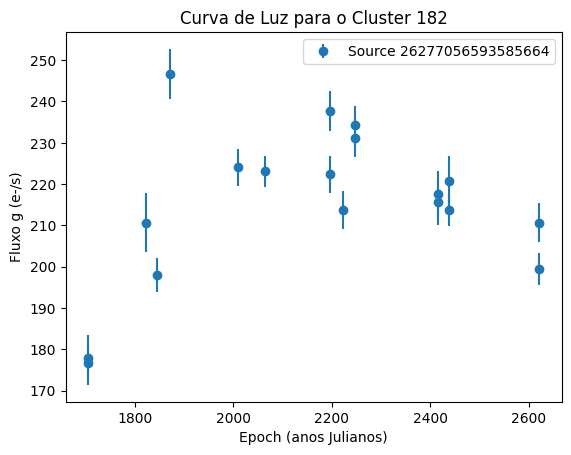

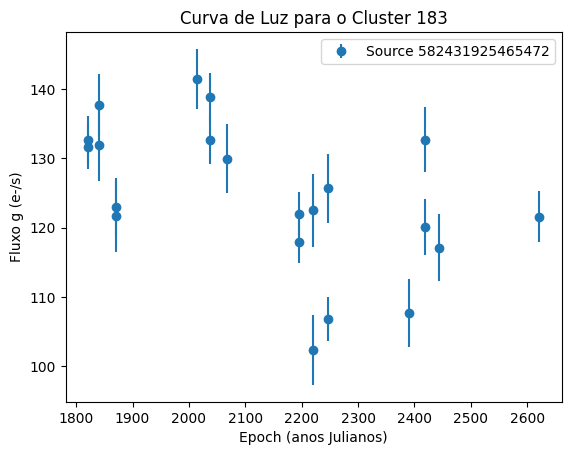

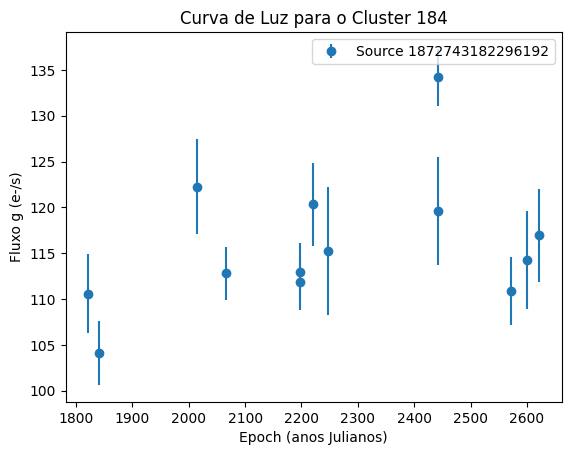

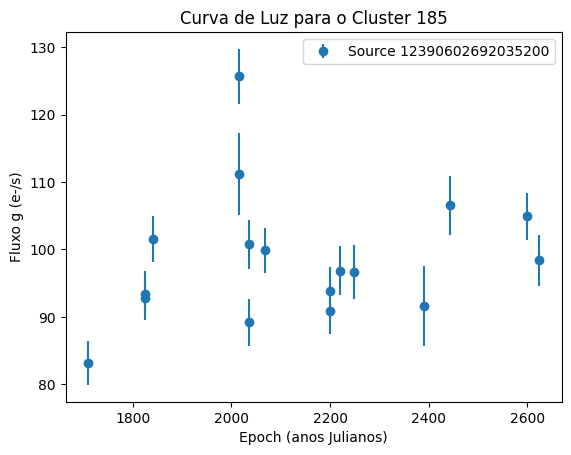

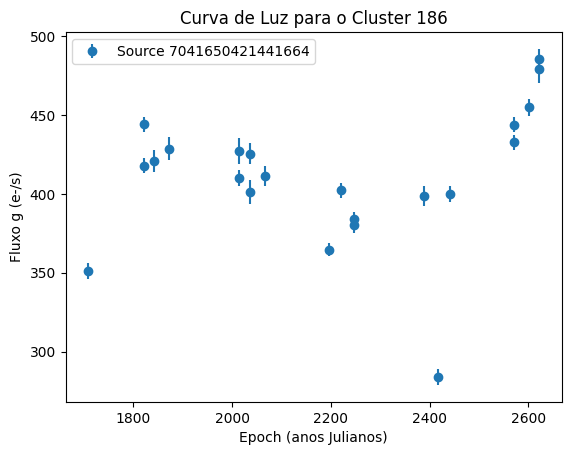

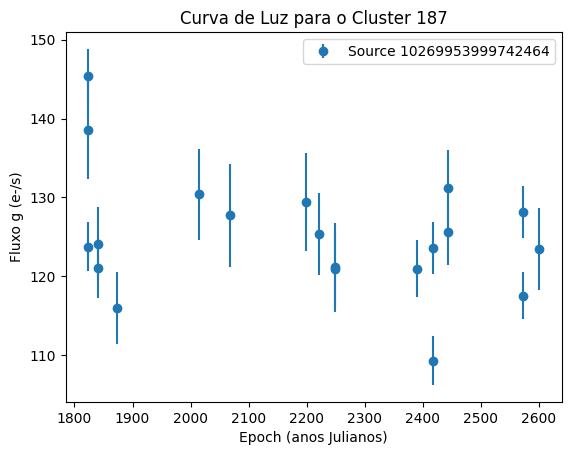

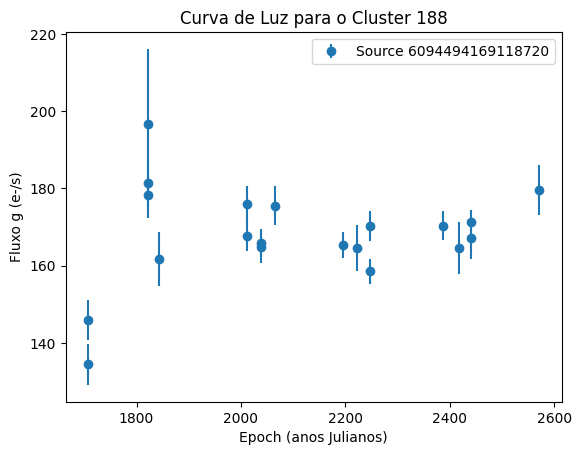

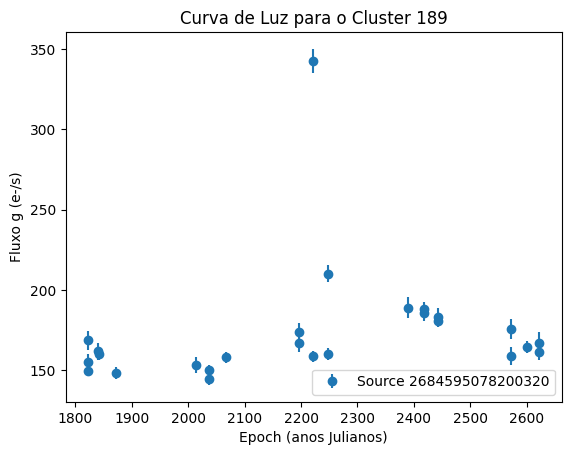

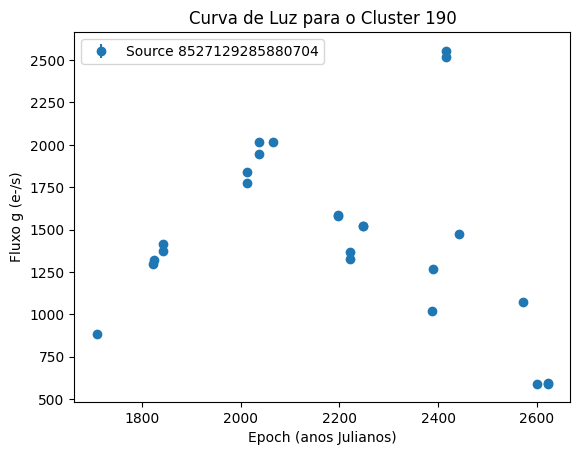

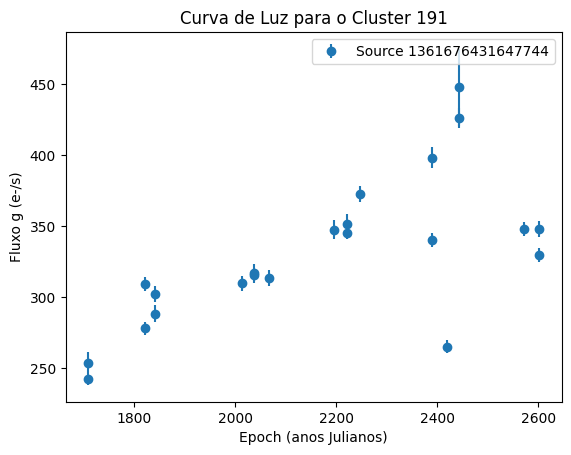

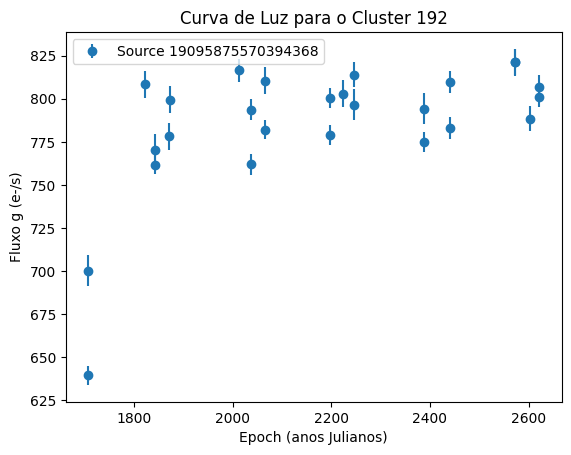

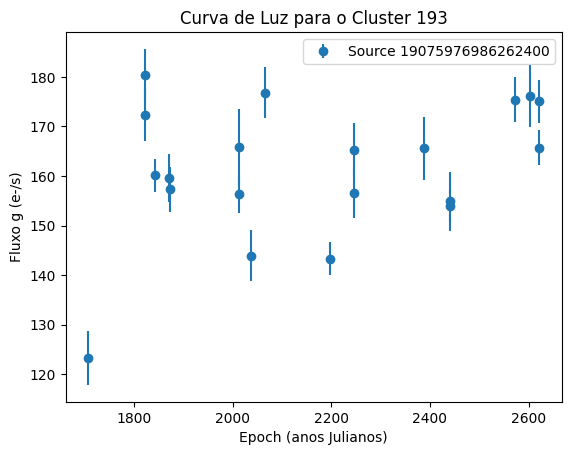

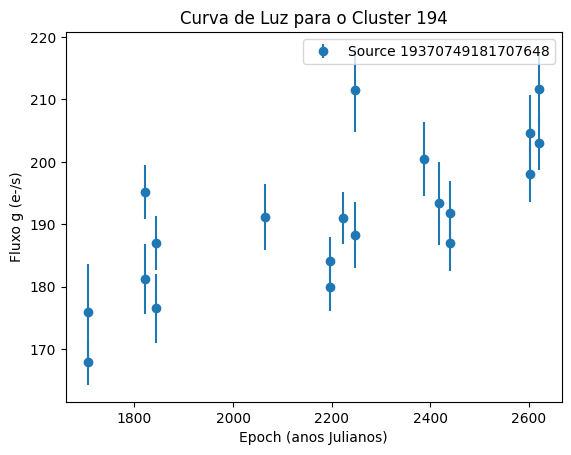

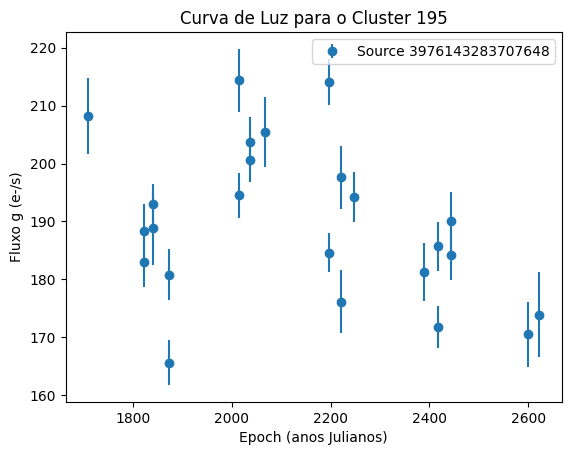

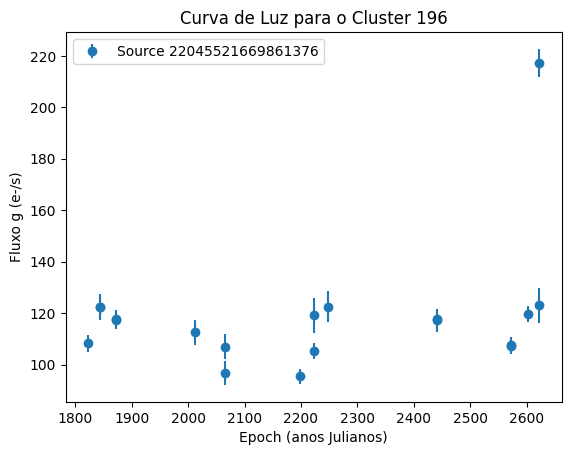

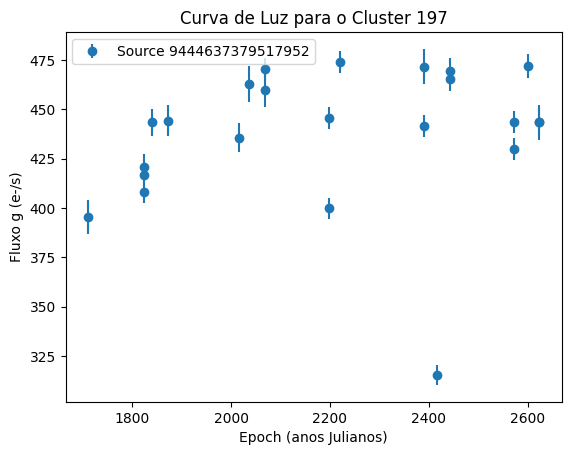

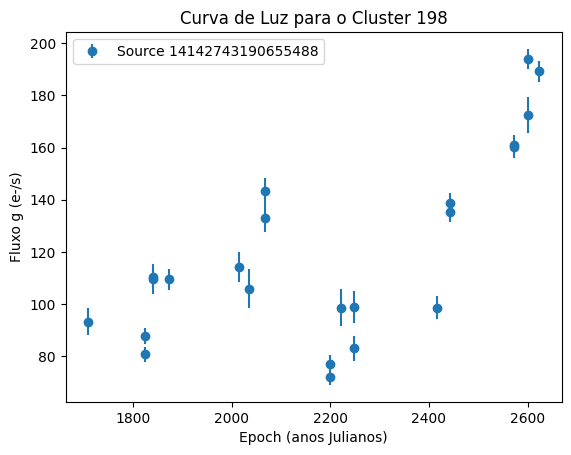

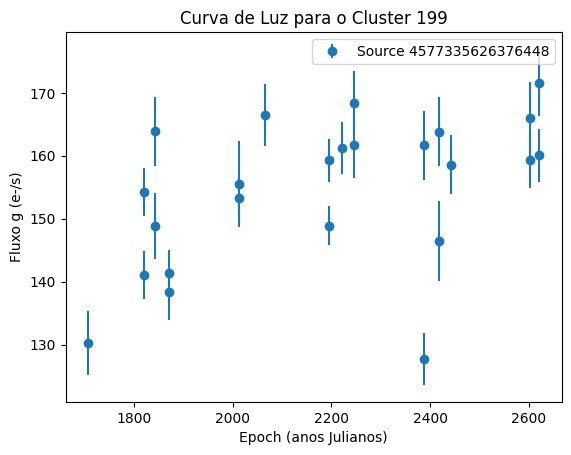

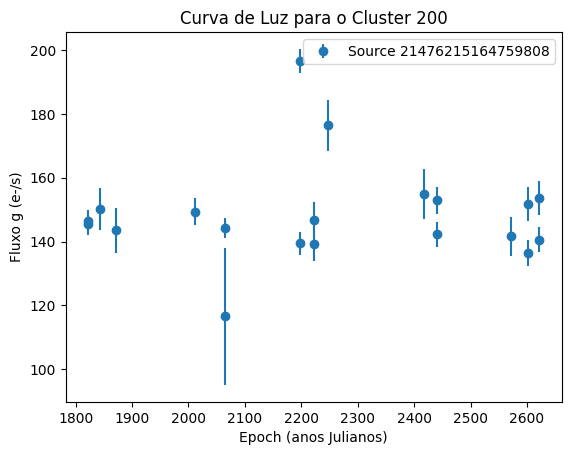

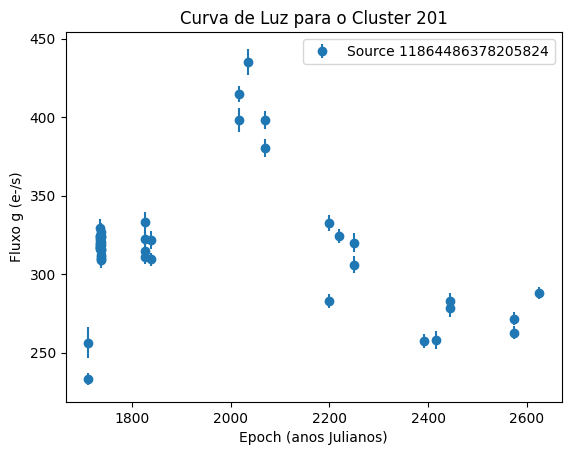

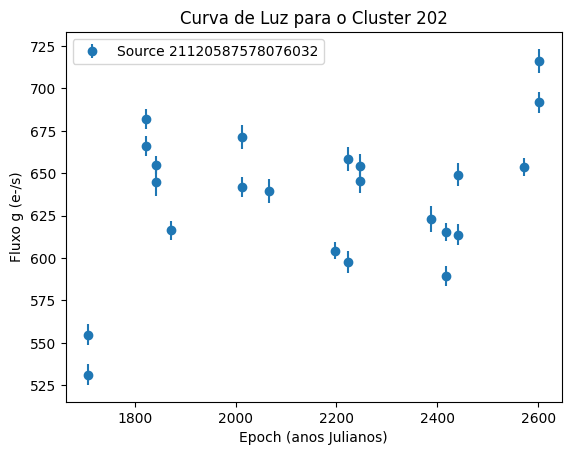

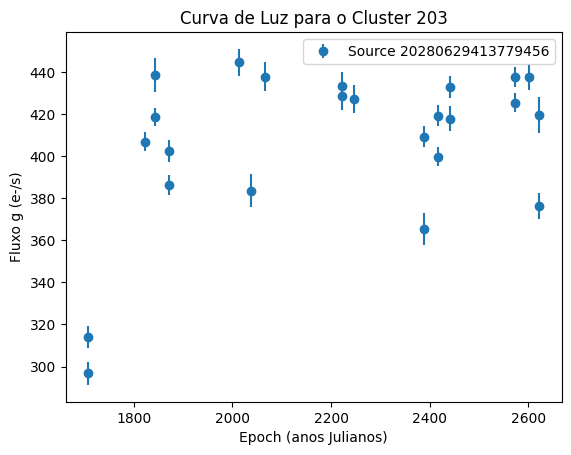

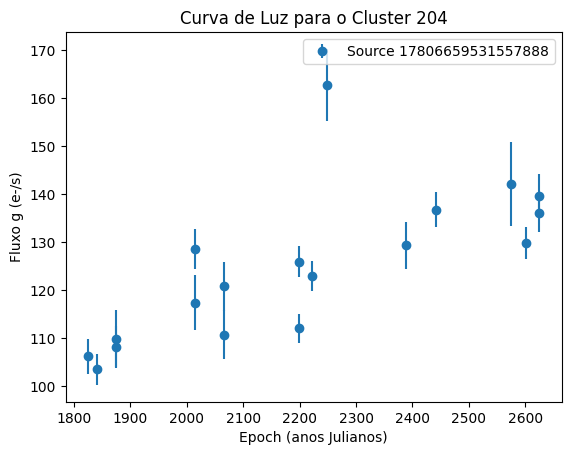

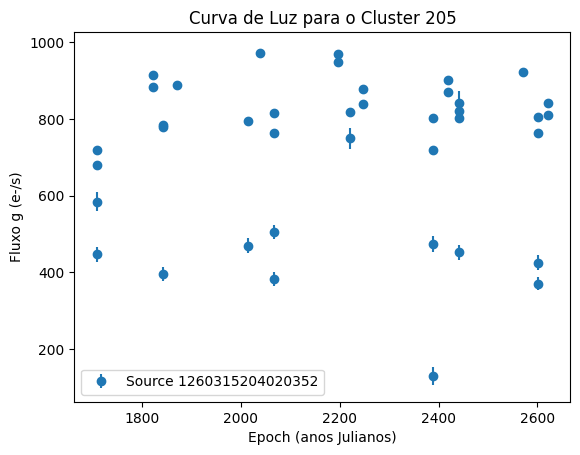

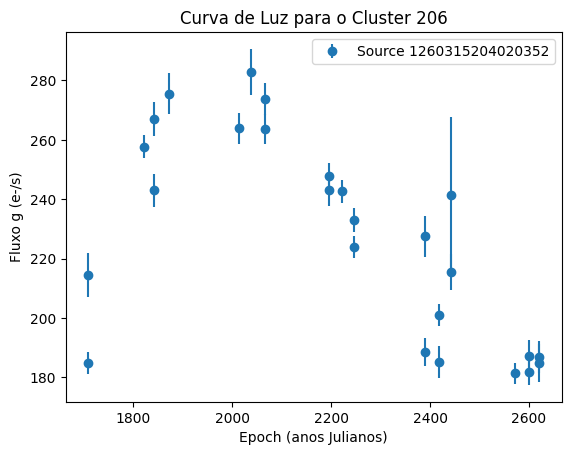

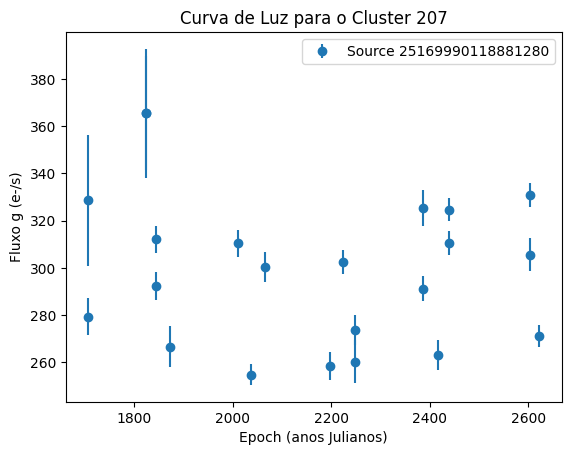

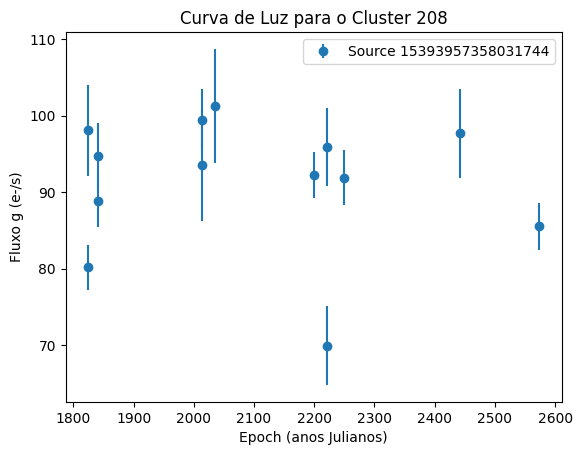

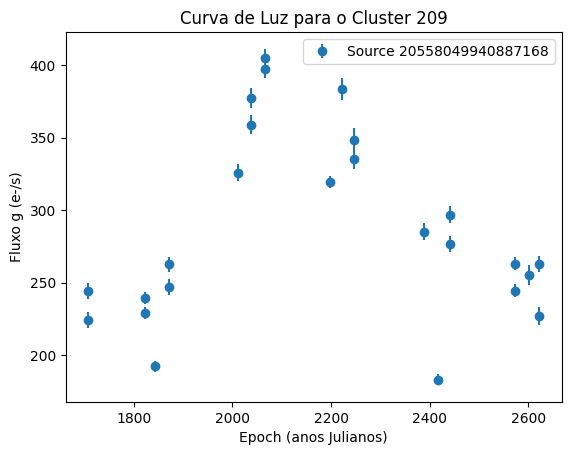

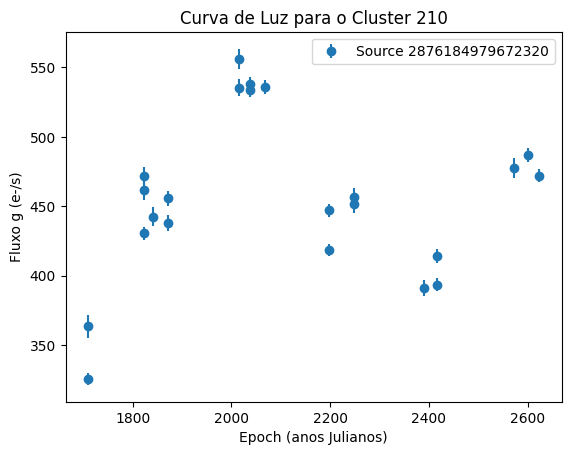

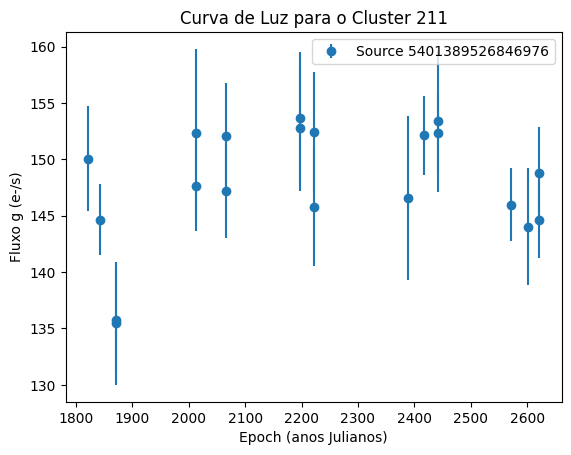

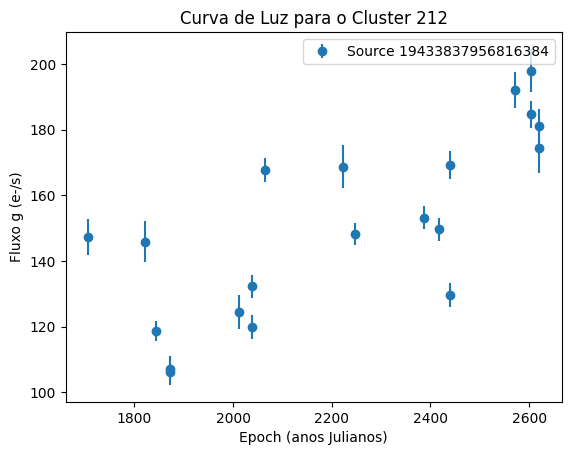

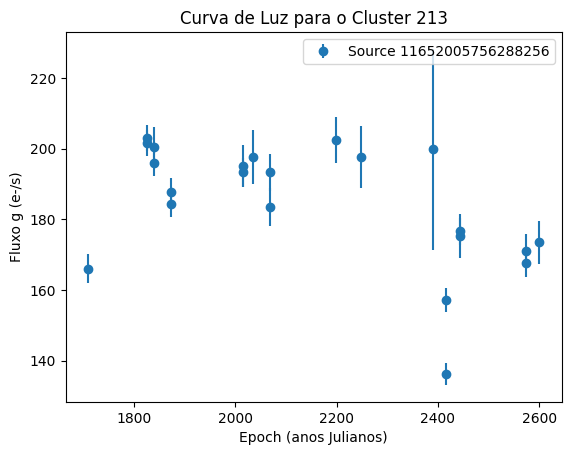

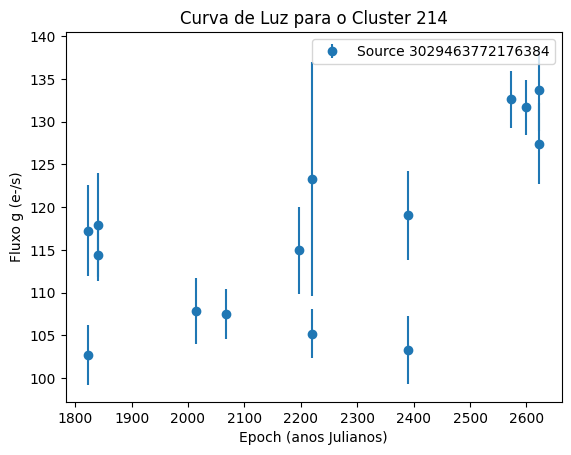

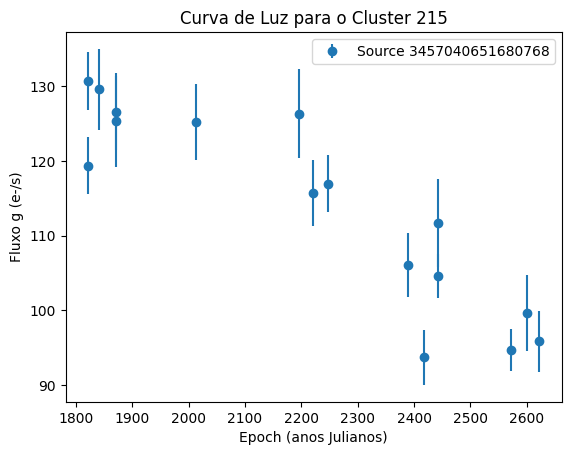

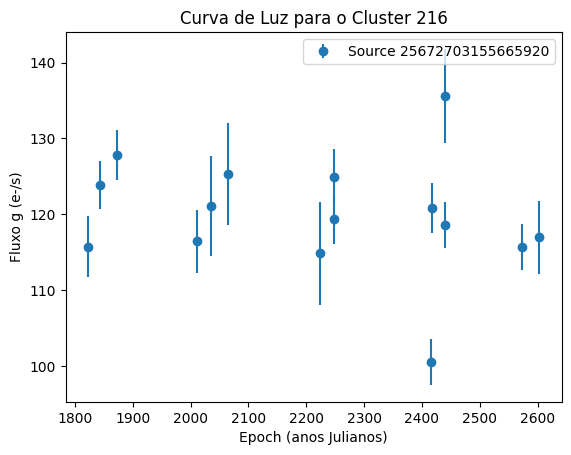

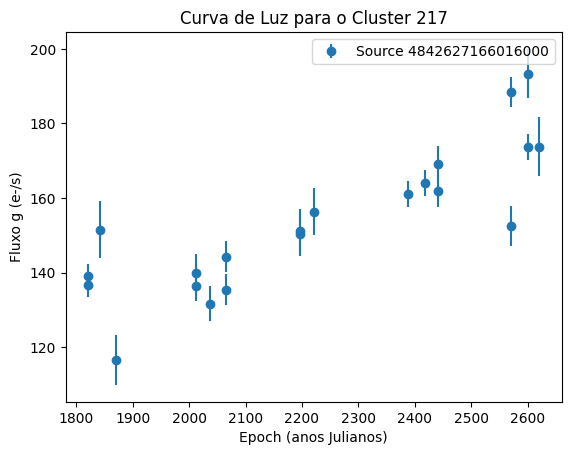

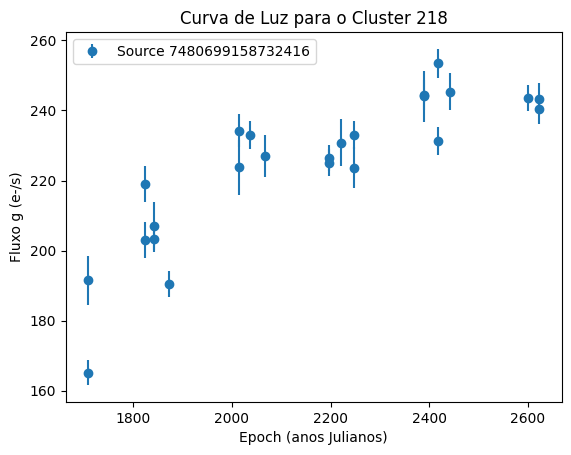

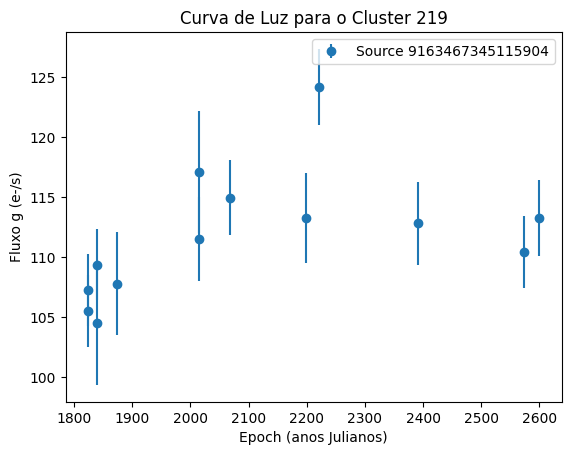

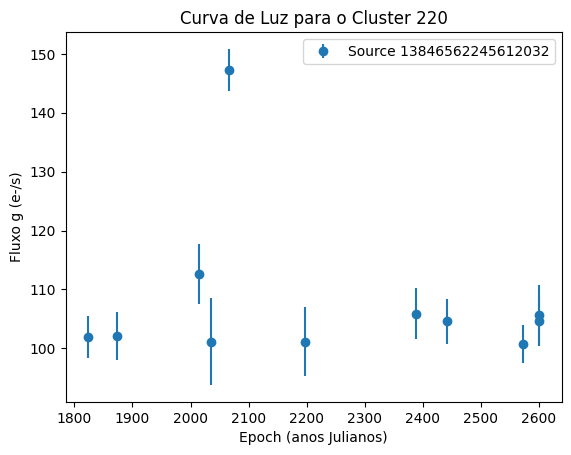

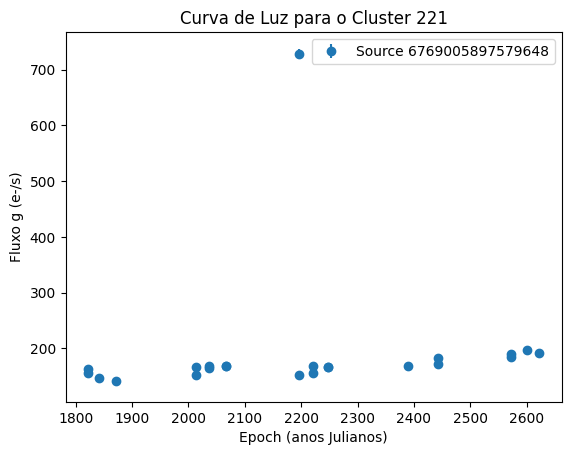

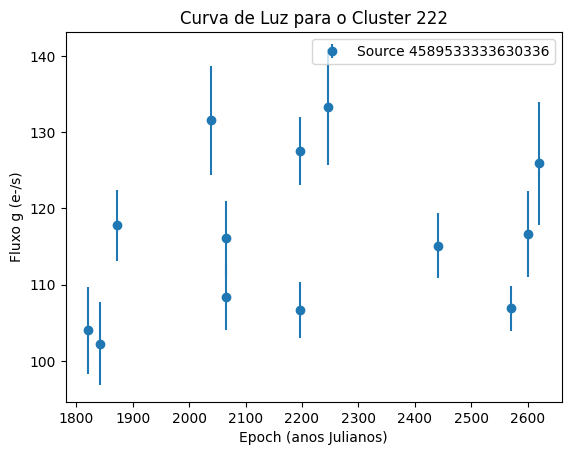

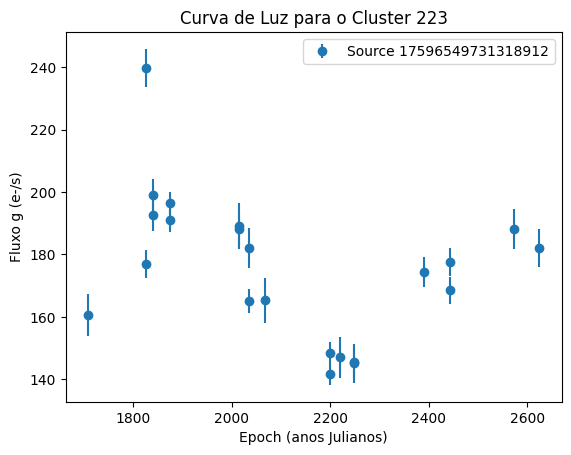

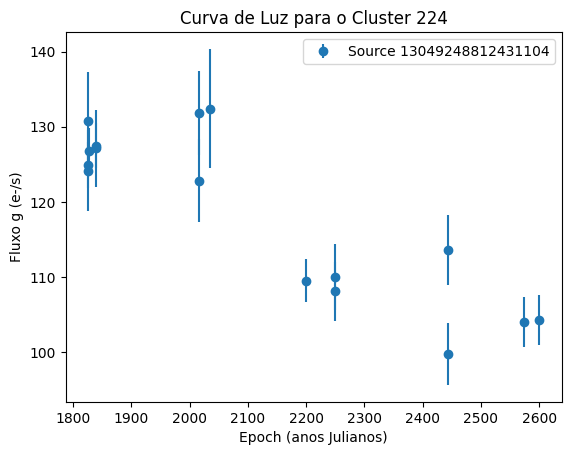

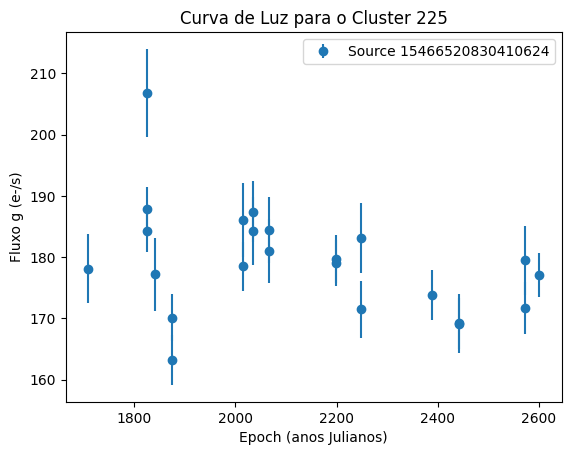

KeyboardInterrupt: 

In [ ]:
from tqdm import tqdm

total_clusters = len(clusters)

progress_bar = tqdm(total=total_clusters, desc='Progresso da Análise de Curva de Luz', unit='cluster')

for cluster in clusters:
    cluster_data = clustered_data[clustered_data['cluster_label'] == cluster]

    plt.figure(figsize=(10, 6))

    for source_id in cluster_data['source_id'].unique():
        source_data = cluster_data[cluster_data['source_id'] == source_id]
        plt.errorbar(source_data['epoch_obs'], source_data['g_flux_obs'],
                     yerr=source_data['g_flux_obs_error'], fmt='o', label=f'Source {source_id}')

    plt.title(f"Curva de Luz para o Cluster {cluster}")
    plt.xlabel('Epoch (anos Julianos)')
    plt.ylabel('Fluxo g (e-/s)')
    plt.legend()
    plt.show()

    progress_bar.update(1)

progress_bar.close()
